<a href="https://colab.research.google.com/github/ScInglorion/AGH_ML_Course/blob/main/Karol_take.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TO DO**

zapytać o thalium - czy jako categorical data skoro sa 3, to mozemy wywalic 6 skoro ni daje duzo i jesli nie 7 i nie 3 to 6.

Czy mozna mergowac pca z normalnym



1) Age - age in years


2) sex 1 = male; 0 = female)


3) chest pain type:


        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
4)BP - resting blood pressure (in mm Hg on admission to the hospital)


5)Cholesterol - serum cholestoral in mg/dl


6)FBS over 120 -(fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)


7)EKG results -resting electrocardiographic results


              -- Value 0: normal
              -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
              -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8)Max HR -maximum heart rate achieved


9)Exercise angina - exercise induced angina (1 = yes; 0 = no)


10)ST depression - ST depression induced by exercise relative to rest


11)Slope of ST - the slope of the peak exercise ST segment


        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
12)Number of vessels fluro - number of major vessels (0-3) colored by flourosopy


13)Thallium -
3 = normal; 6 = fixed defect; 7 = reversable defect


14)Heart Disease - diagnosis of heart disease (angiographic disease status)


        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing

In [145]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
sns.set_theme()

df = pd.read_csv('/content/drive/MyDrive/Collab_project/Heart_Disease_Prediction.csv')
print(len(df))
drive.mount('/content/drive')
df.drop_duplicates()
df.dropna()
print(len(df))

270
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
270


In [ ]:
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [113]:
df_after_ohe =  pd.get_dummies(df, columns = ['Chest pain type', 'EKG results', 'Slope of ST', 'Thallium'])

In [114]:
df_after_ohe["Heart Disease"]=df_after_ohe["Heart Disease"].map({"Absence":0,"Presence":1})

In [ ]:
df_after_ohe.head()

,index,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,Chest pain type_4,EKG results_0,EKG results_1,EKG results_2,Slope of ST_1,Slope of ST_2,Slope of ST_3,Thallium_3,Thallium_6,Thallium_7
0,0,70,1,130,322,0,109,0,2.4,3,...,1,0,0,1,0,1,0,1,0,0
1,1,67,0,115,564,0,160,0,1.6,0,...,0,0,0,1,0,1,0,0,0,1
2,2,57,1,124,261,0,141,0,0.3,0,...,0,1,0,0,1,0,0,0,0,1
3,3,64,1,128,263,0,105,1,0.2,1,...,1,1,0,0,0,1,0,0,0,1
4,4,74,0,120,269,0,121,1,0.2,1,...,0,0,0,1,1,0,0,1,0,0


In [ ]:
df_after_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   Max HR                   270 non-null    int64  
 7   Exercise angina          270 non-null    int64  
 8   ST depression            270 non-null    float64
 9   Number of vessels fluro  270 non-null    int64  
 10  Heart Disease            270 non-null    int64  
 11  Chest pain type_1        270 non-null    uint8  
 12  Chest pain type_2        270 non-null    uint8  
 13  Chest pain type_3        270 non-null    uint8  
 14  Chest pain type_4        2

In [ ]:
df_after_ohe.describe()

,index,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,Chest pain type_4,EKG results_0,EKG results_1,EKG results_2,Slope of ST_1,Slope of ST_2,Slope of ST_3,Thallium_3,Thallium_6,Thallium_7
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,134.500000,54.433333,0.677778,131.344444,249.659259,0.148148,149.677778,0.329630,1.05000,0.670370,...,0.477778,0.485185,0.007407,0.507407,0.481481,0.451852,0.066667,0.562963,0.051852,0.385185
std,78.086491,9.109067,0.468195,17.861608,51.686237,0.355906,23.165717,0.470952,1.14521,0.943896,...,0.500434,0.500709,0.085906,0.500874,0.500585,0.498601,0.249907,0.496941,0.222140,0.487543
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.250000,48.000000,0.000000,120.000000,213.000000,0.000000,133.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,134.500000,55.000000,1.000000,130.000000,245.000000,0.000000,153.500000,0.000000,0.80000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,201.750000,61.000000,1.000000,140.000000,280.000000,0.000000,166.000000,1.000000,1.60000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,269.000000,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.20000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
Y = df_after_ohe['Number of vessels fluro']
X = df_after_ohe.drop(['Number of vessels fluro', 'Heart Disease', 'index'], axis = 1)
x_train_a, x_test, y_train, y_test, = train_test_split(X, Y, test_size = 0.2, train_size = 0.8)
x_train_a, x_val, y_train, y_val, = train_test_split(x_train_a, y_train, test_size = 0.25, train_size = 0.75)
print(len(x_train_a))
print(len(x_val))
print(len(x_test))

162
54
54


In [ ]:
x_train_a.head()


,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Chest pain type_1,Chest pain type_2,...,Chest pain type_4,EKG results_0,EKG results_1,EKG results_2,Slope of ST_1,Slope of ST_2,Slope of ST_3,Thallium_3,Thallium_6,Thallium_7
95,47,1,110,275,0,118,1,1.0,0,0,...,1,0,0,1,0,1,0,1,0,0
134,54,1,150,232,0,165,0,1.6,0,0,...,0,0,0,1,1,0,0,0,0,1
202,60,1,125,258,0,141,1,2.8,0,0,...,1,0,0,1,0,1,0,0,0,1
31,66,1,160,228,0,138,0,2.3,0,0,...,1,0,0,1,1,0,0,0,1,0
152,54,0,108,267,0,167,0,0.0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [ ]:
x_train_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 95 to 245
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                162 non-null    int64  
 1   Sex                162 non-null    int64  
 2   BP                 162 non-null    int64  
 3   Cholesterol        162 non-null    int64  
 4   FBS over 120       162 non-null    int64  
 5   Max HR             162 non-null    int64  
 6   Exercise angina    162 non-null    int64  
 7   ST depression      162 non-null    float64
 8   Chest pain type_1  162 non-null    uint8  
 9   Chest pain type_2  162 non-null    uint8  
 10  Chest pain type_3  162 non-null    uint8  
 11  Chest pain type_4  162 non-null    uint8  
 12  EKG results_0      162 non-null    uint8  
 13  EKG results_1      162 non-null    uint8  
 14  EKG results_2      162 non-null    uint8  
 15  Slope of ST_1      162 non-null    uint8  
 16  Slope of ST_2      162 no

x_train_wc - set without cholesterol outliers


x_train_ad - set without depression outliers


x_train normalized - normalized set


x_train_standardized - standardized set

x_train_nor_o - set withith outliers



In [147]:
# Due to the fact that cholesterol over 240 is consider high, and after level of 420 there is a break between value that is somewhere around 550, we decided taht any value over 500 can be considered an outlier
y_train = y_train.drop(x_train_a[x_train_a['Cholesterol']>500].index,axis = 0)
x_train_wc = x_train_a.drop(x_train_a[x_train_a['Cholesterol']>500].index,axis = 0)

# Due to data exploration we decided that st depression lvels over 4.5 may as well be considered outliers, since there are only 4 values over 4, 2 of which are 4.2 and 2 of which are around 6, so there's quite a jump there
y_train_ad = y_train.drop(x_train_wc[x_train_wc['ST depression']>=4.5].index,axis = 0)
x_train_ad = x_train_wc.drop(x_train_wc[x_train_wc['ST depression']>=4.5].index,axis = 0)

In [ ]:
print(len(x_train_a))
print(len(x_train_wc))
print(len(x_train_ad))

162
161
160
160


In [148]:
from sklearn.preprocessing import (
MinMaxScaler,
StandardScaler,
)
minmax_scaler = MinMaxScaler().set_output(transform="pandas")

x_train_nor_o = minmax_scaler.fit_transform(x_train_a)

x_train_nor = minmax_scaler.fit_transform(x_train_ad)
x_val_nor = minmax_scaler.fit_transform(x_val)
x_test_nor = minmax_scaler.fit_transform(x_test)


standard_scaler = StandardScaler().set_output(transform="pandas")
x_train_standardized = standard_scaler.fit_transform(x_train_ad[['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']])
x_val_standardized = standard_scaler.fit_transform(x_val[['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']])
x_test_standardized = standard_scaler.fit_transform(x_test[['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']])

x_train_standardized = pd.concat([x_train_standardized, x_train_ad.drop(['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression'], axis = 1)], axis=1)
x_val_standardized = pd.concat([x_val_standardized, x_val.drop(['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression'], axis = 1)], axis=1)
x_test_standardized = pd.concat([x_test_standardized, x_test.drop(['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression'], axis = 1)], axis=1)


pca = PCA().set_output(transform="pandas").fit(x_train_nor)
X_train_normalized_pca = pca.transform(x_train_nor)
pca = PCA().set_output(transform="pandas").fit(x_val_nor)
X_val_normalized_pca = pca.transform(x_val_nor)
pca = PCA().set_output(transform="pandas").fit(x_test_nor)
X_test_normalized_pca = pca.transform(x_test_nor)

X_train_normalized_pca = X_train_normalized_pca[['pca0','pca1','pca2','pca3']]
X_val_normalized_pca = X_val_normalized_pca[['pca0','pca1','pca2','pca3']]
X_test_normalized_pca = X_test_normalized_pca[['pca0','pca1','pca2','pca3']]


In [149]:
# non ohc set, not really usefull

dfY = df['Number of vessels fluro']
dfX = df.drop(['Number of vessels fluro', 'Heart Disease', 'index'], axis = 1)
dfx_train_a, dfx_test, dfy_train, dfy_test, = train_test_split(dfX, dfY, test_size = 0.2, train_size = 0.8)
dfx_train_a, dfx_val, dfy_train, dfy_val, = train_test_split(dfx_train_a, dfy_train, test_size = 0.25, train_size = 0.75)

# Due to the fact that cholesterol over 240 is consider high, and after level of 420 there is a break between value that is somewhere around 550, we decided taht any value over 500 can be considered an outlier
dfy_train = dfy_train.drop(dfx_train_a[dfx_train_a['Cholesterol']>500].index,axis = 0)
dfx_train_wc = dfx_train_a.drop(dfx_train_a[dfx_train_a['Cholesterol']>500].index,axis = 0)

# Due to data exploration we decided that st depression lvels over 4.5 may as well be considered outliers, since there are only 4 values over 4, 2 of which are 4.2 and 2 of which are around 6, so there's quite a jump there
dfy_train_ad = dfy_train.drop(dfx_train_wc[dfx_train_wc['ST depression']>=4.5].index,axis = 0)
dfx_train_ad = dfx_train_wc.drop(dfx_train_wc[dfx_train_wc['ST depression']>=4.5].index,axis = 0)

dfx_train_nor = minmax_scaler.fit_transform(dfx_train_ad)
dfx_val_nor = minmax_scaler.fit_transform(dfx_val)
dfx_test_nor = minmax_scaler.fit_transform(dfx_test)




In [ ]:
x_train_nor.head()

,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Chest pain type_1,Chest pain type_2,...,Chest pain type_4,EKG results_0,EKG results_1,EKG results_2,Slope of ST_1,Slope of ST_2,Slope of ST_3,Thallium_3,Thallium_6,Thallium_7
153,0.697674,0.0,0.367347,0.629893,0.0,0.317757,0.0,0.322581,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.511628,1.0,0.367347,0.462633,1.0,0.504673,1.0,0.096774,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
11,0.441860,1.0,0.489796,0.355872,0.0,0.214953,1.0,0.000000,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
257,0.488372,1.0,0.387755,0.807829,0.0,0.411215,1.0,0.193548,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
236,0.441860,0.0,0.448980,0.384342,0.0,0.672897,0.0,0.000000,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


<Axes: xlabel='Age', ylabel='Count'>

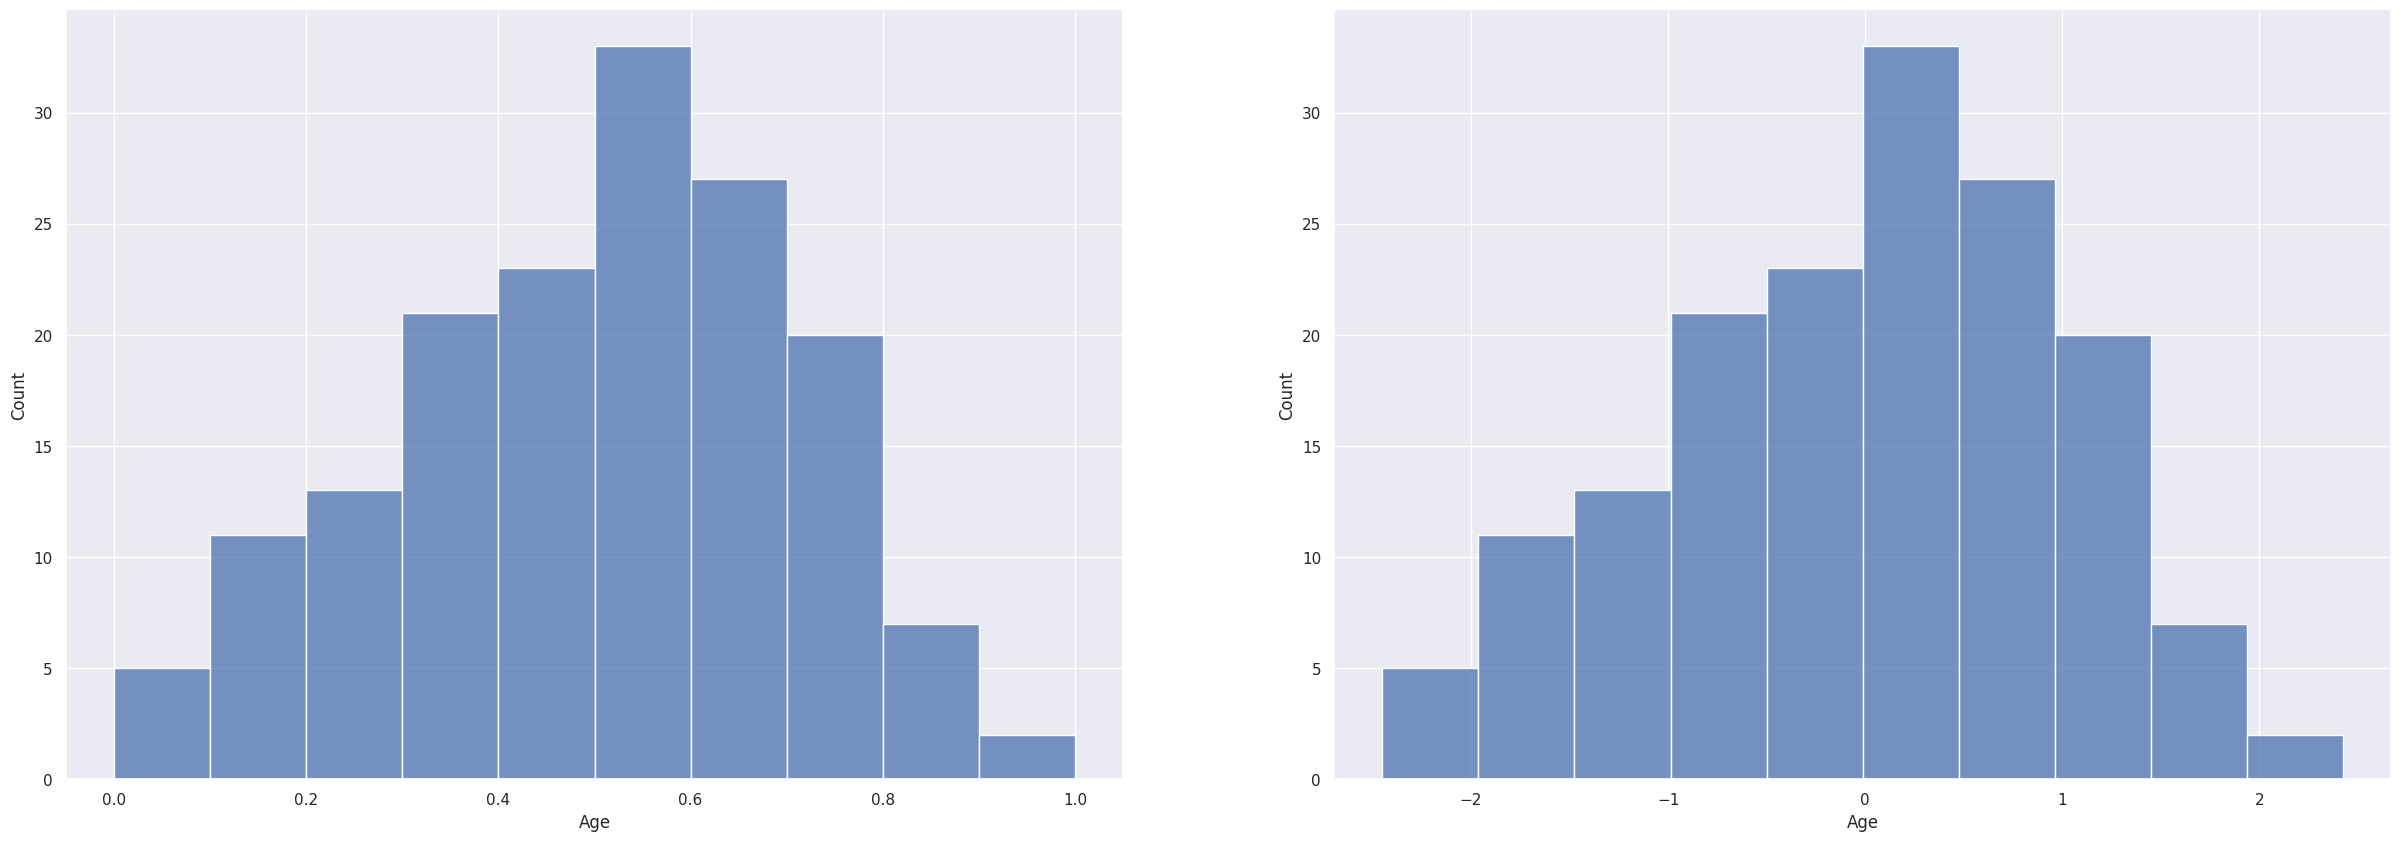

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(30,10))
sns.histplot(x_train_nor['Age'], ax = axes[0])
sns.histplot(x_train_standardized['Age'], ax = axes[1])

Text(0.5, 1.0, 'Cholesterol')

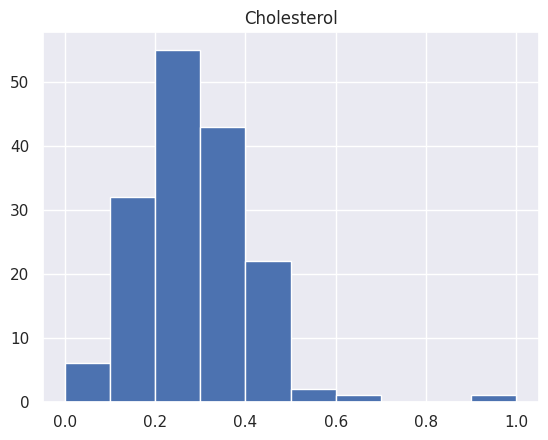

In [ ]:
# Beofre deleting outlier
plt.hist(x_train_nor_o['Cholesterol'])
plt.title("Cholesterol")

Text(0.5, 1.0, 'Cholesterol')

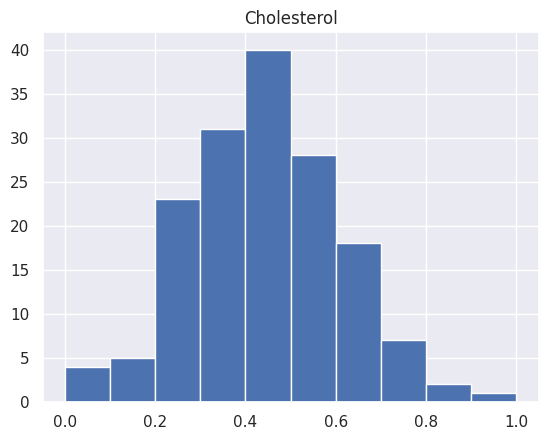

In [ ]:
# After deleting outliers

plt.hist(x_train_nor['Cholesterol'])
plt.title("Cholesterol")

<Axes: xlabel='BP', ylabel='Count'>

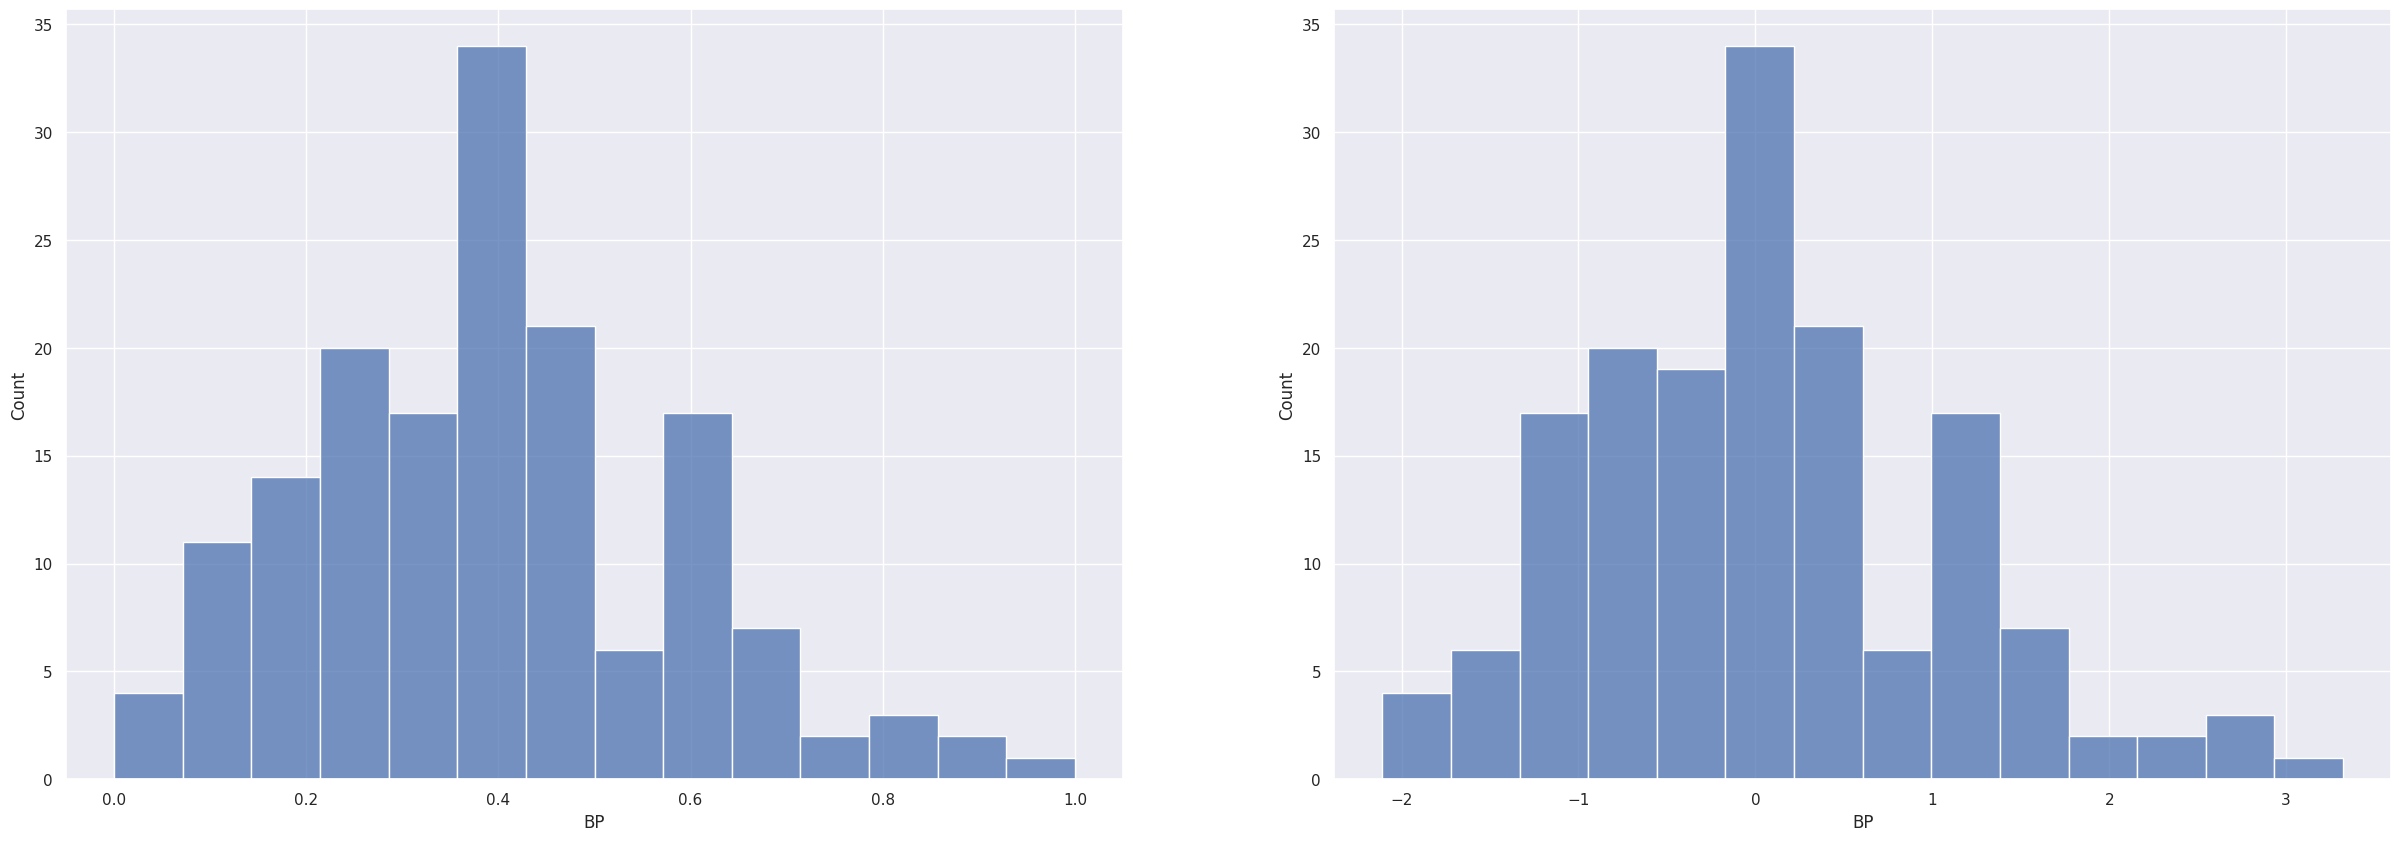

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(30,10))
sns.histplot(x_train_nor['BP'], ax = axes[0])
sns.histplot(x_train_standardized['BP'], ax = axes[1])

<Axes: xlabel='FBS over 120', ylabel='Count'>

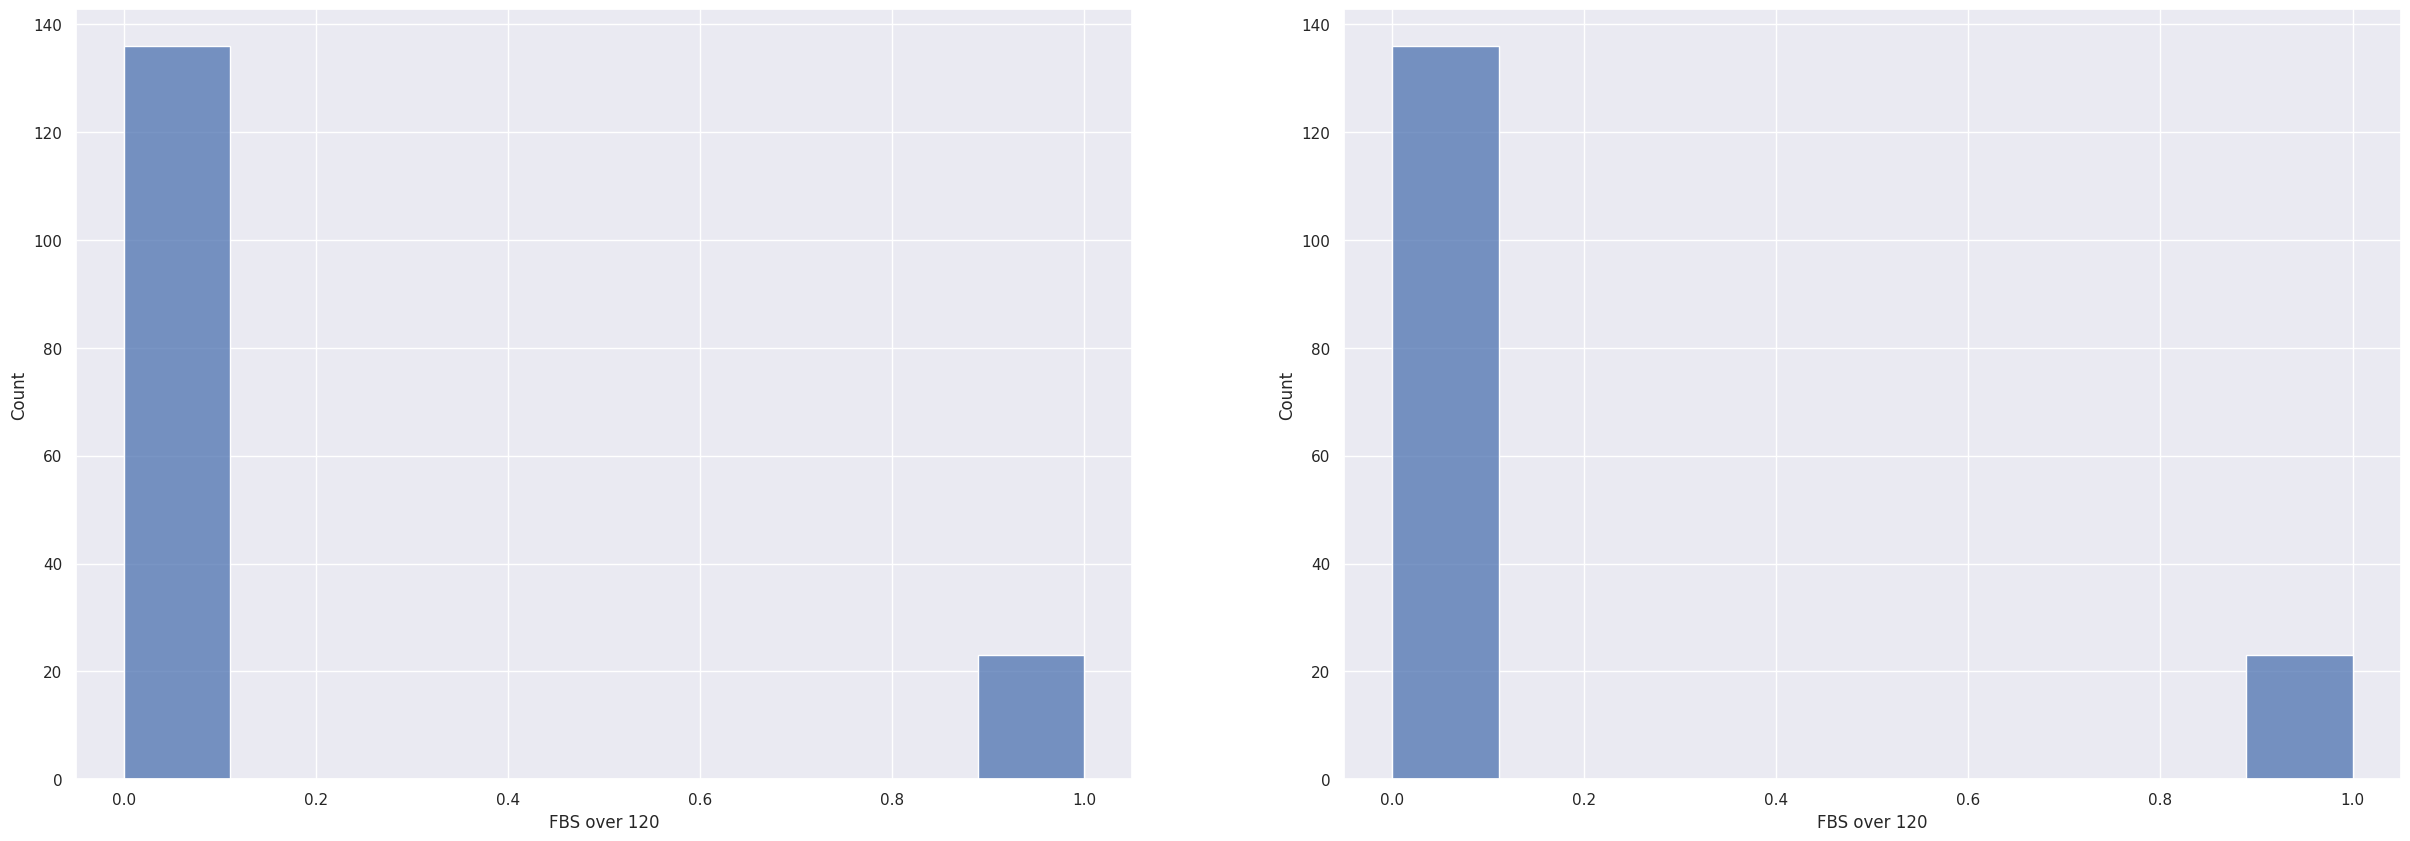

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(30,10))
sns.histplot(x_train_nor['FBS over 120'], ax = axes[0])
sns.histplot(x_train_standardized['FBS over 120'], ax = axes[1])

Text(0.5, 1.0, 'number of fluro vessels')

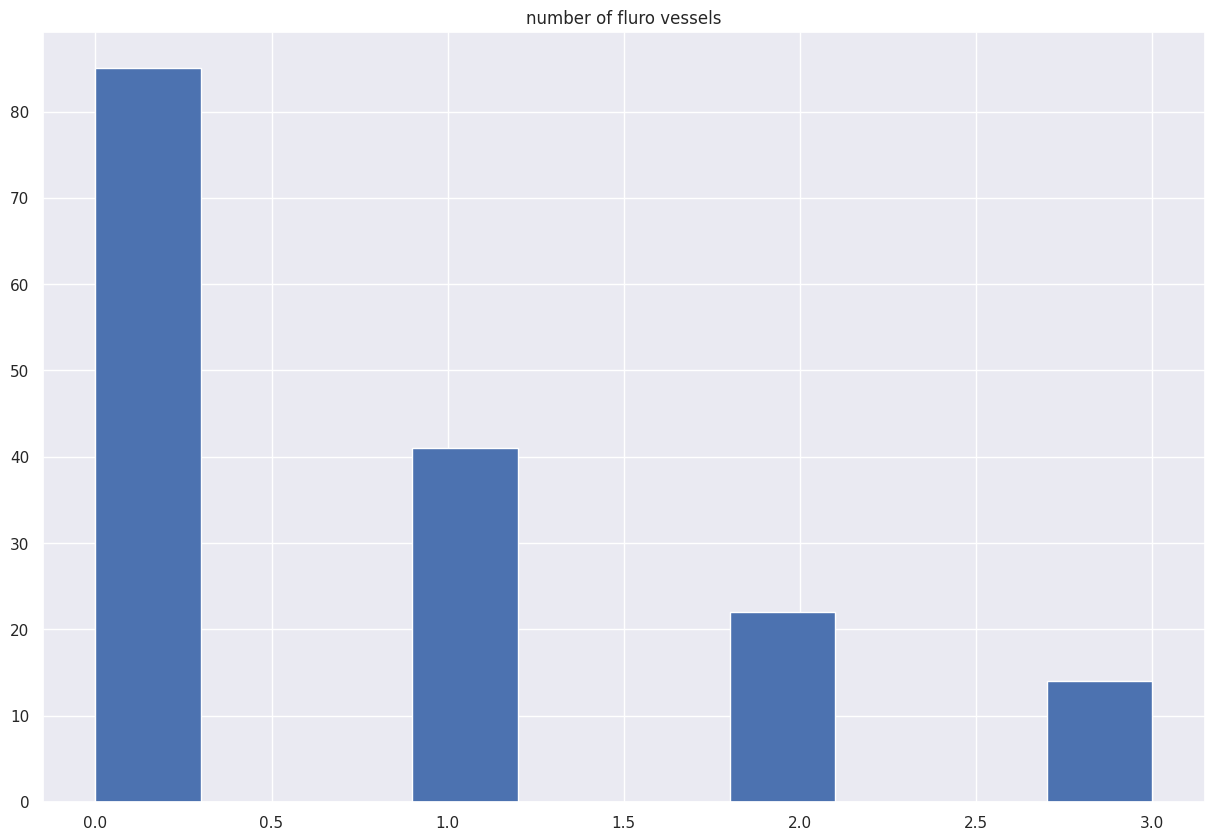

In [ ]:
fig, axes = plt.subplots(1, 1, sharex=False, figsize=(15,10))
plt.hist(y_train)
plt.title("number of fluro vessels")

<Axes: xlabel='FBS over 120', ylabel='Number of vessels fluro'>

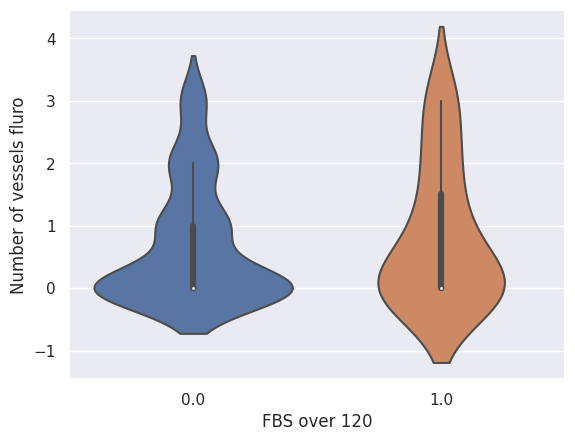

In [ ]:
sns.violinplot(x = 'FBS over 120', y = y_train, data = x_train_nor)

St depression beofre deleting outlier

<Axes: xlabel='ST depression', ylabel='Max HR'>

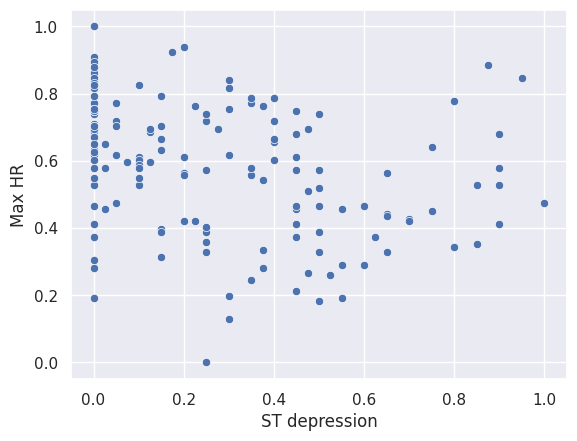

In [ ]:
sns.scatterplot(x = x_train_nor['ST depression'],y = x_train_nor['Max HR'])

<Axes: xlabel='ST depression', ylabel='Age'>

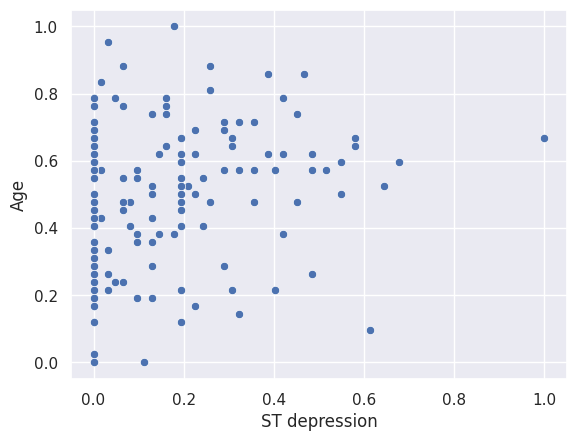

In [ ]:
sns.scatterplot(x = x_train_nor['ST depression'],y = x_train_nor['Age'])

<Axes: xlabel='Number of vessels fluro', ylabel='ST depression'>

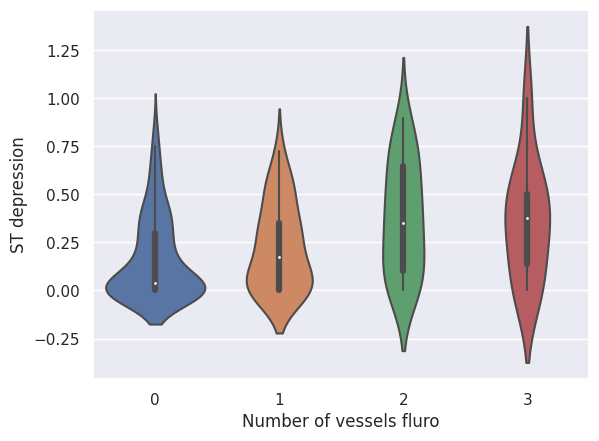

In [104]:
sns.violinplot(x = y_train, y = x_train_nor['ST depression'])

ST before deleting outlier

<Axes: xlabel='BP', ylabel='ST depression'>

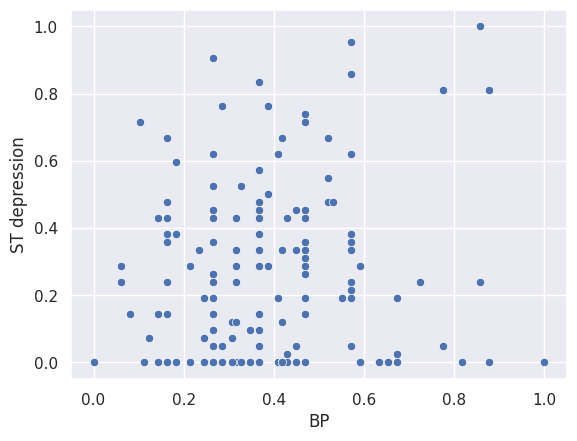

In [ ]:
sns.scatterplot(x = x_train_nor['BP'],y = x_train_nor['ST depression'])

<Axes: xlabel='BP', ylabel='ST depression'>

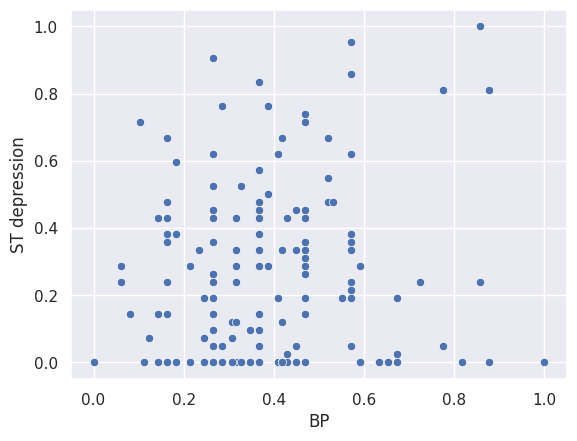

In [ ]:
sns.scatterplot(x = x_train_nor['BP'],y = x_train_nor['ST depression'])

<Axes: xlabel='Age', ylabel='ST depression'>

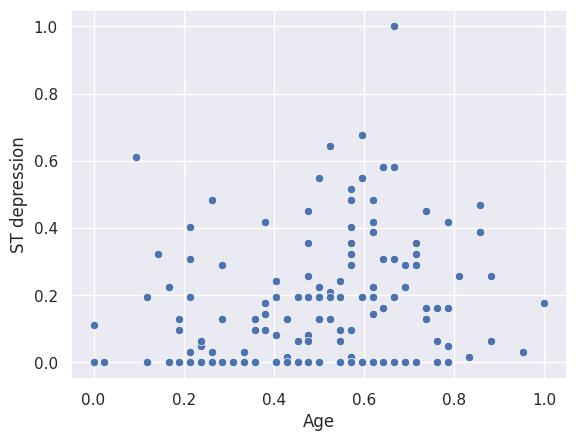

In [ ]:
sns.scatterplot(x = x_train_nor['Age'],y = x_train_nor['ST depression'])

<Axes: xlabel='Max HR', ylabel='ST depression'>

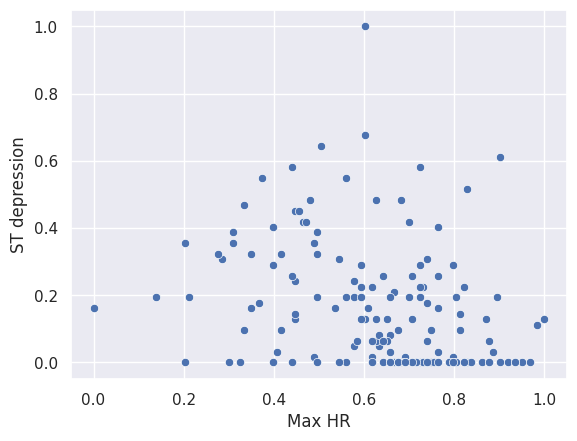

In [ ]:
sns.scatterplot(x = x_train_nor['Max HR'],y = x_train_nor['ST depression'])

Text(0.5, 1.0, 'ST depression')

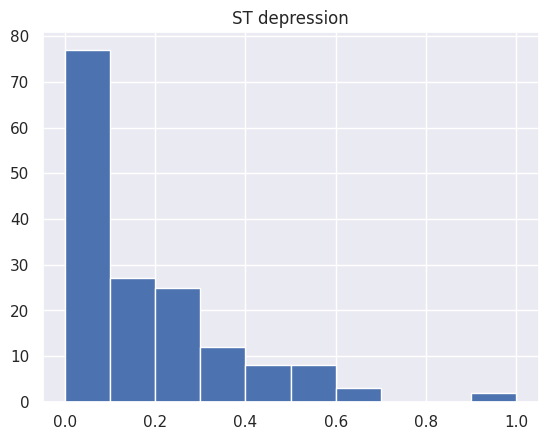

In [ ]:
plt.hist(x_train_nor_o['ST depression'])
plt.title("ST depression")

St after deletion of outliers

Text(0.5, 1.0, 'ST depression')

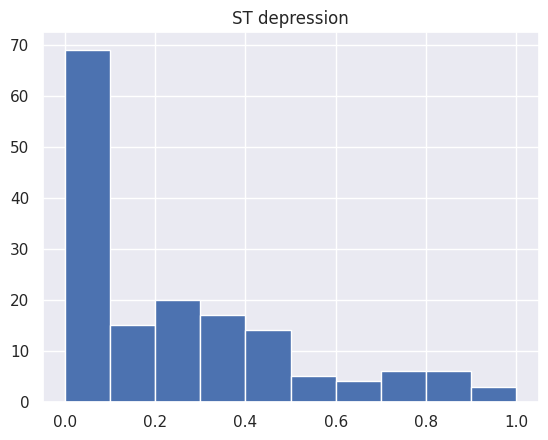

In [ ]:
plt.hist(x_train_nor['ST depression'])
plt.title("ST depression")

<Axes: xlabel='Max HR', ylabel='BP'>

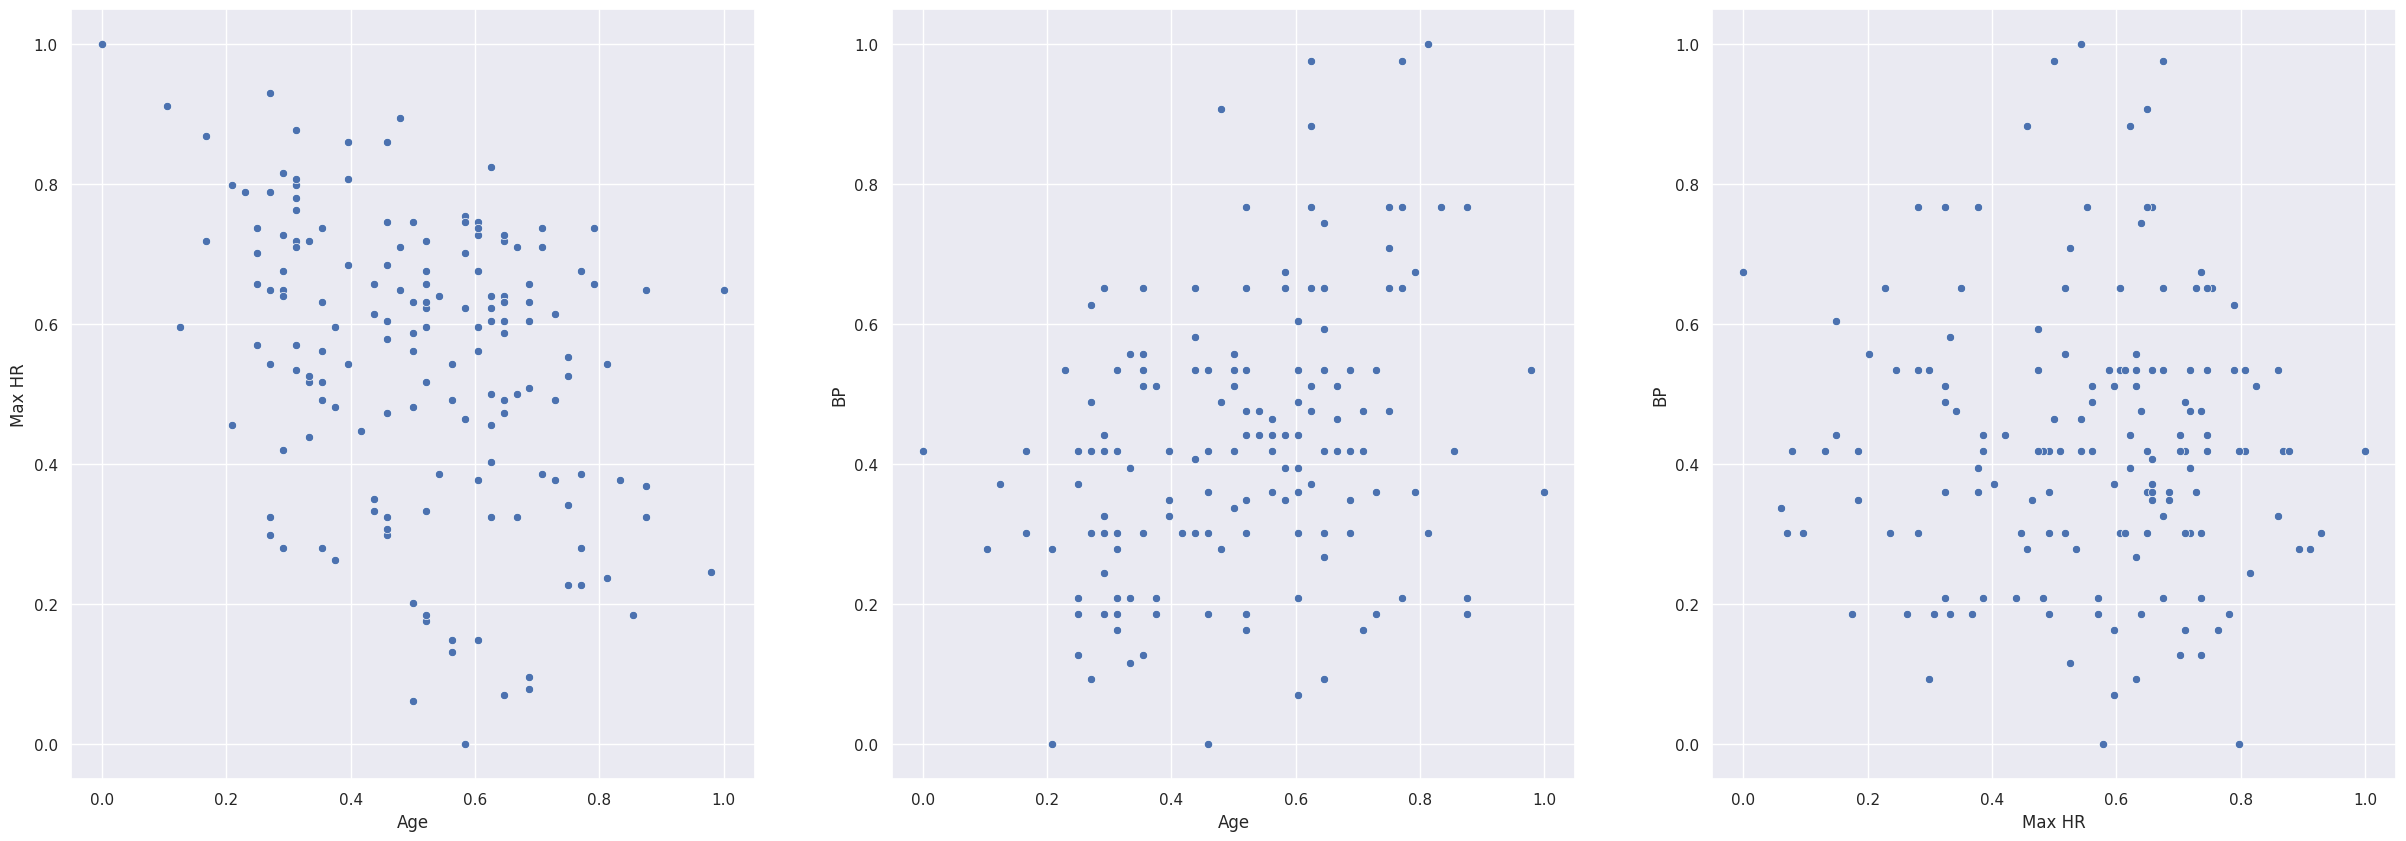

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(30,10))
sns.scatterplot(x = x_train_nor['Age'],y = x_train_nor['Max HR'], ax = axes[0])
sns.scatterplot(x = x_train_nor['Age'],y = x_train_nor['BP'], ax = axes[1])
sns.scatterplot(x = x_train_nor['Max HR'],y = x_train_nor['BP'], ax = axes[2])

<Axes: xlabel='Age', ylabel='Max HR'>

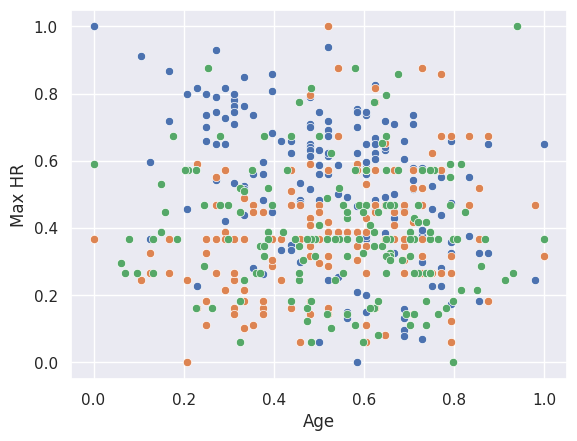

In [ ]:
sns.scatterplot(x = x_train_nor['Age'],y = x_train_nor['Max HR'])
sns.scatterplot(x = x_train_nor['Age'],y = x_train_nor['BP'])
sns.scatterplot(x = x_train_nor['Max HR'],y = x_train_nor['BP'])

<Axes: xlabel='Slope of ST_3', ylabel='Count'>

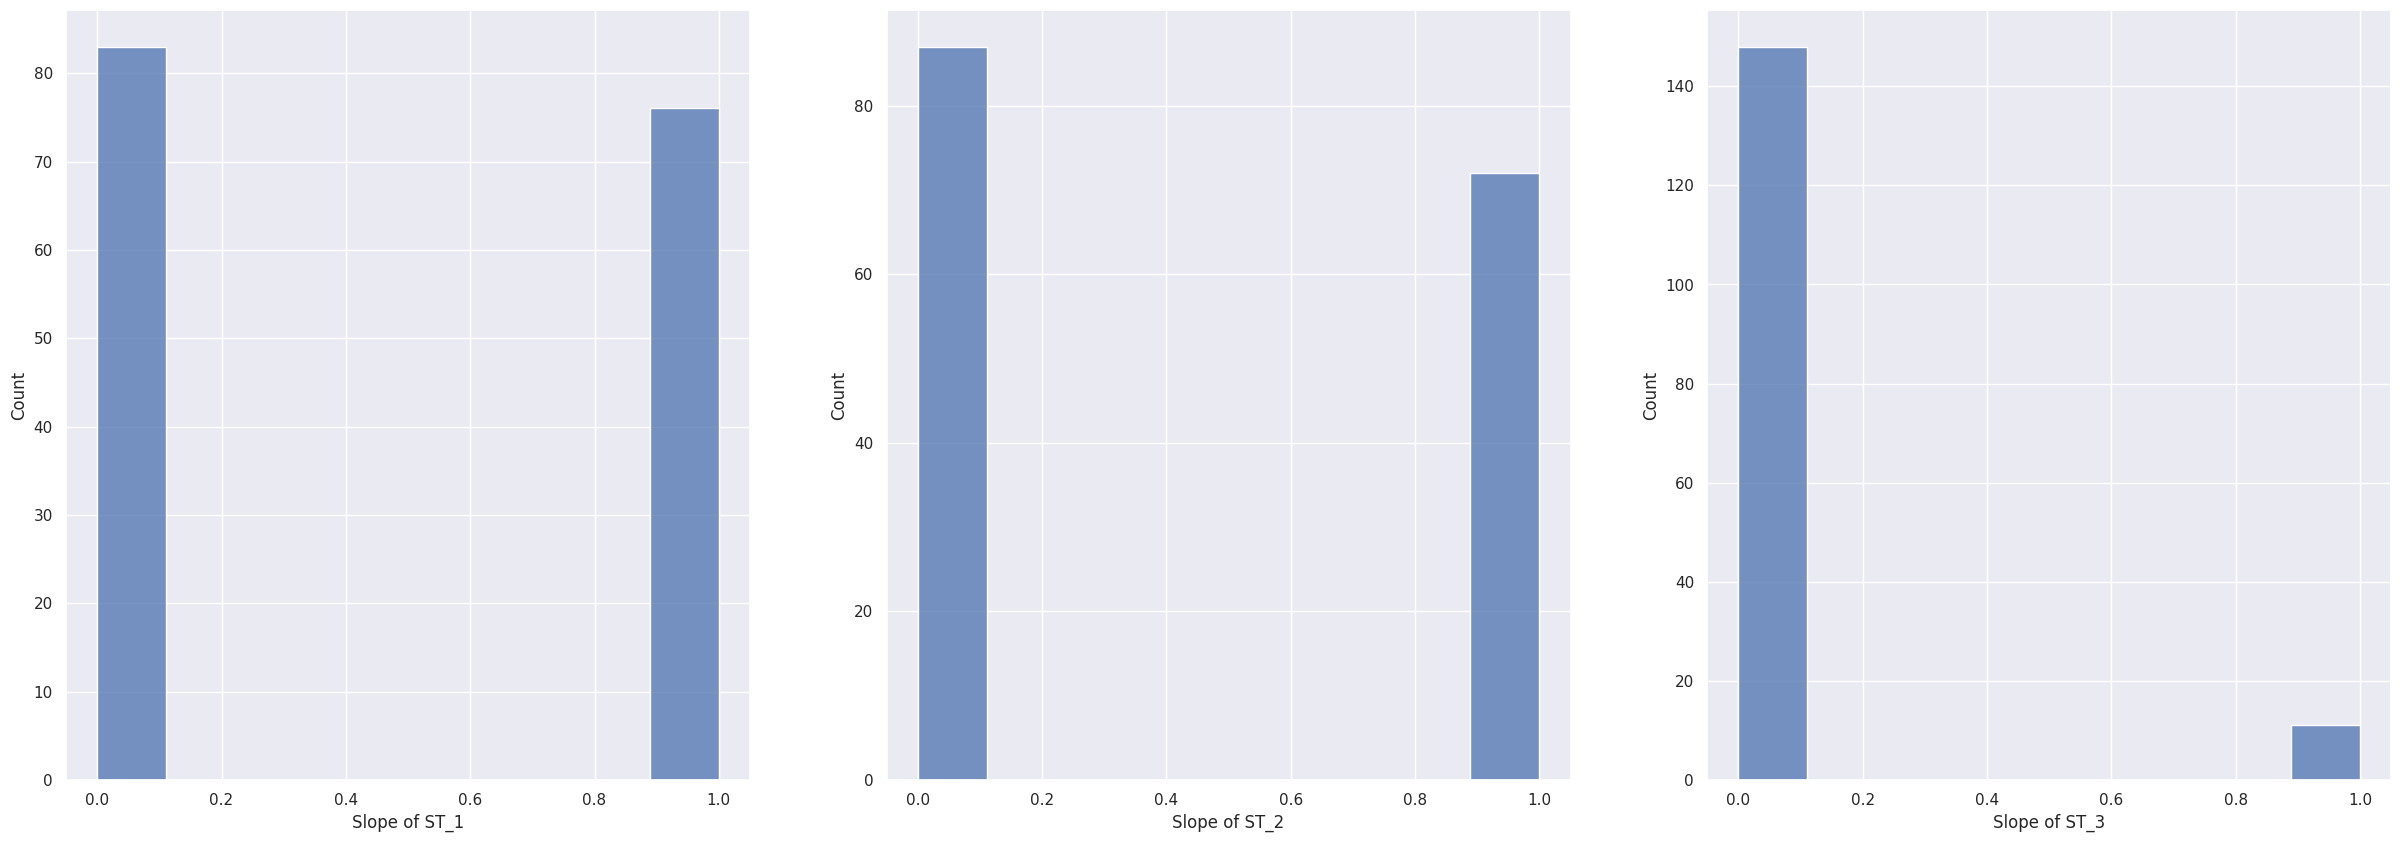

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(30,10))
sns.histplot(x_train_nor['Slope of ST_1'], ax = axes[0])
sns.histplot(x_train_nor['Slope of ST_2'], ax = axes[1])
sns.histplot(x_train_nor['Slope of ST_3'], ax = axes[2])

<Axes: xlabel='Slope of ST_3', ylabel='Number of vessels fluro'>

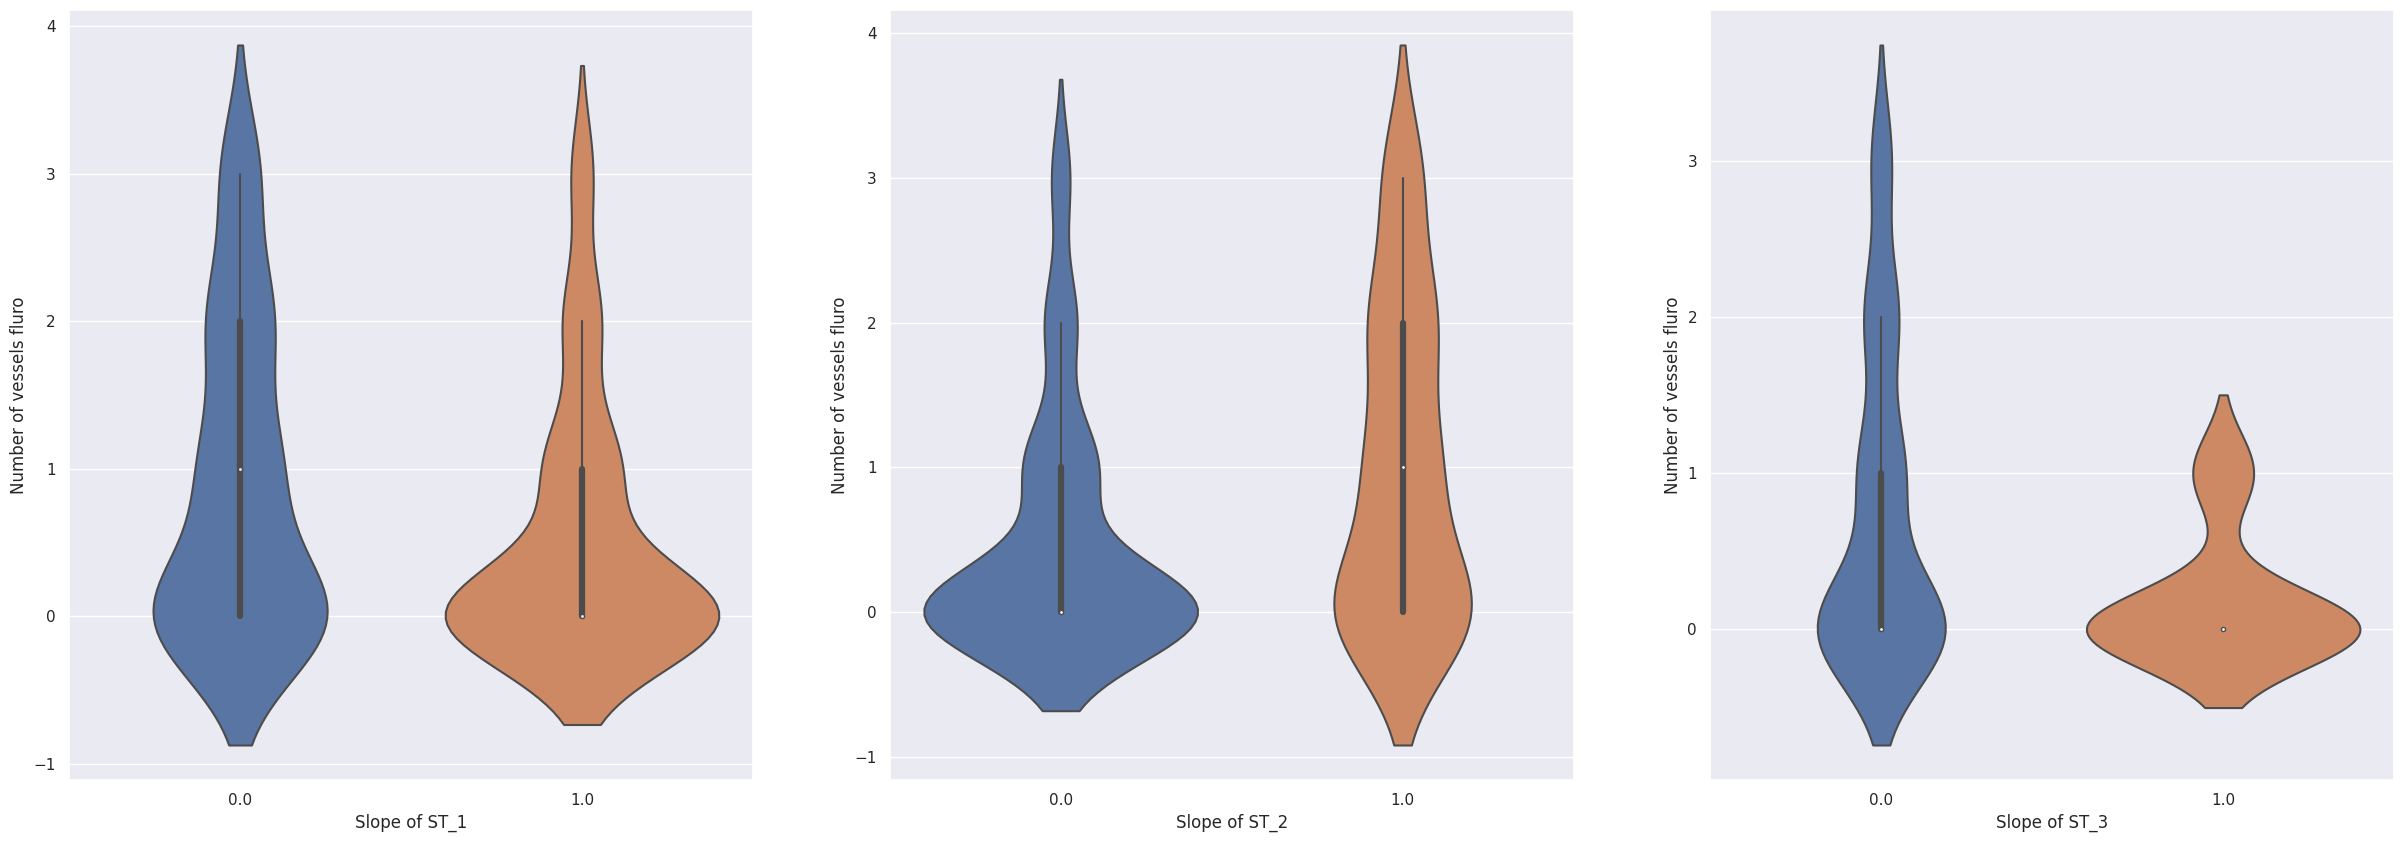

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(30,10))
sns.violinplot(ax=axes[0], x =x_train_nor['Slope of ST_1'] , y = y_train)
sns.violinplot(ax=axes[1], x =x_train_nor['Slope of ST_2'] , y = y_train)
sns.violinplot(ax=axes[2], x =x_train_nor['Slope of ST_3'] , y = y_train)

<Axes: xlabel='Slope of ST_3', ylabel='Number of vessels fluro'>

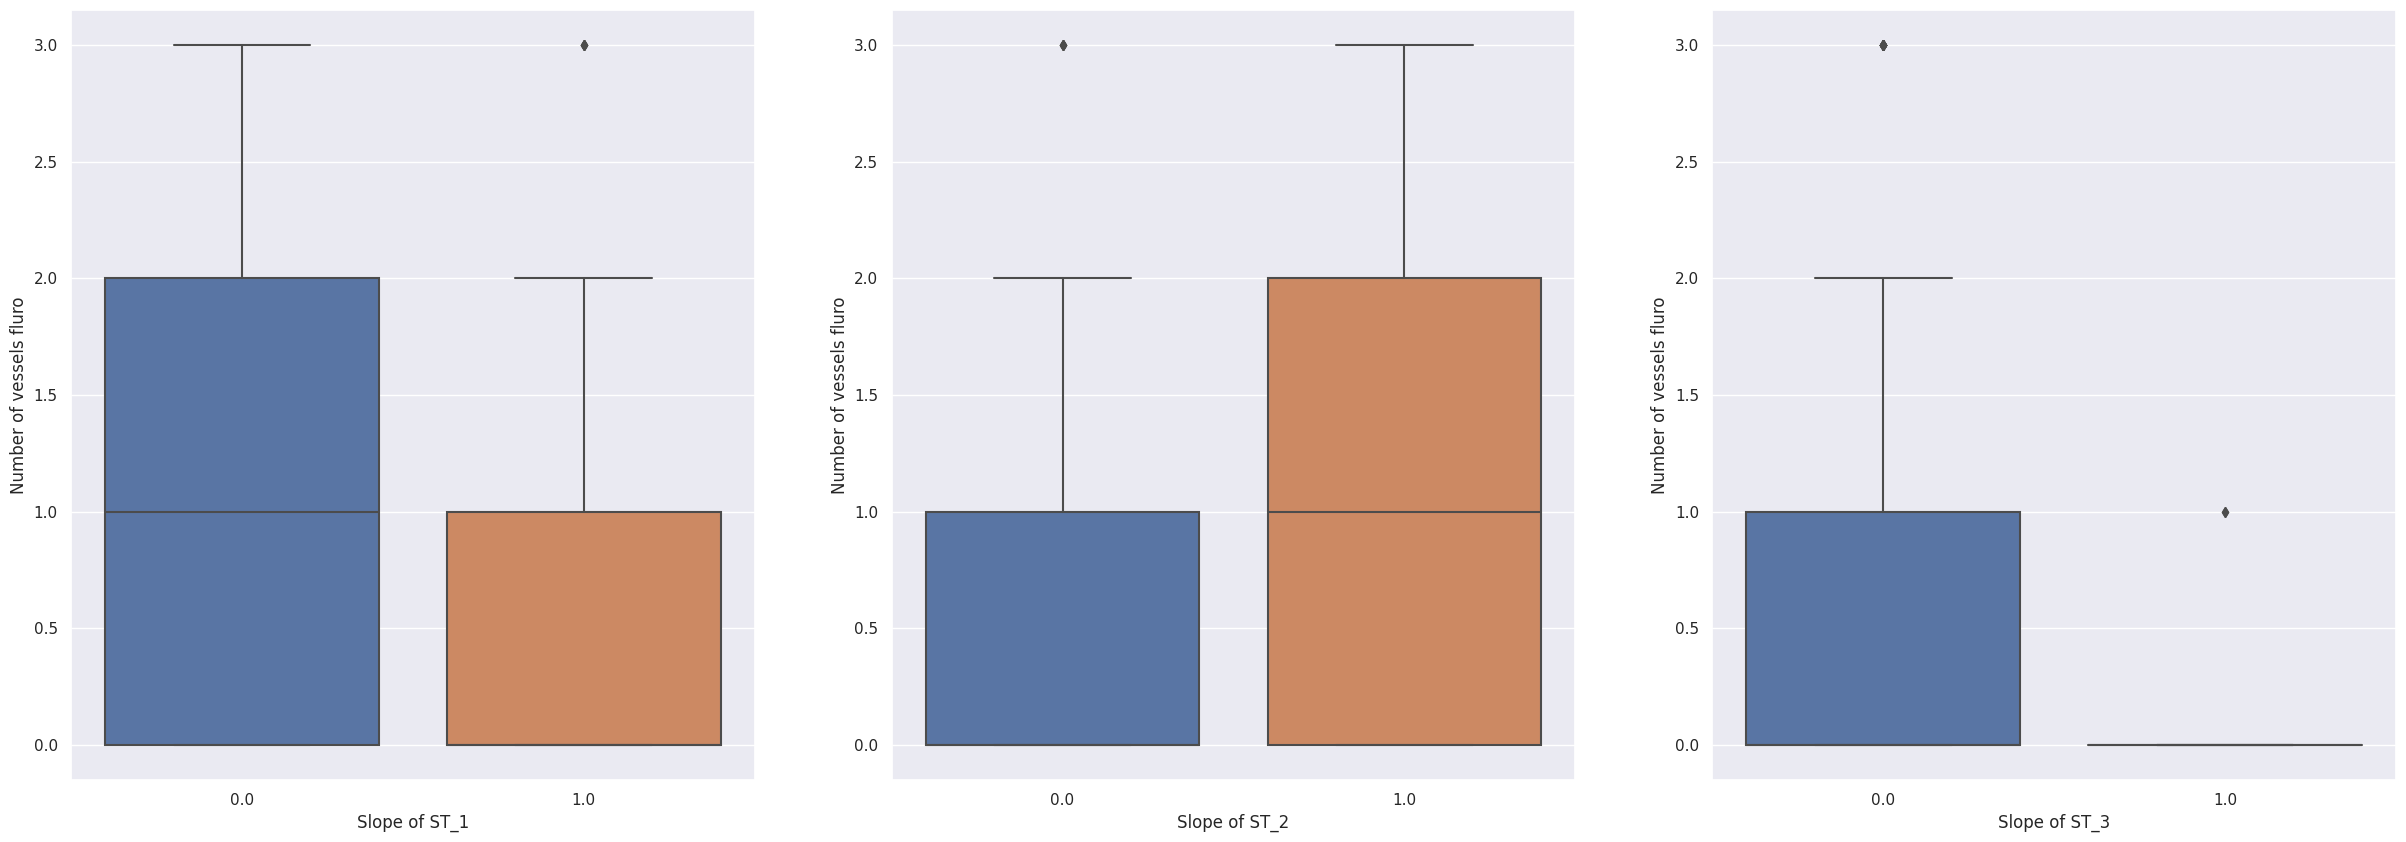

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(30,10))
sns.boxplot(ax=axes[0], x =x_train_nor['Slope of ST_1'] , y = y_train)
sns.boxplot(ax=axes[1], x =x_train_nor['Slope of ST_2'] , y = y_train)
sns.boxplot(ax=axes[2], x =x_train_nor['Slope of ST_3'] , y = y_train)

<Axes: xlabel='EKG results_2', ylabel='Number of vessels fluro'>

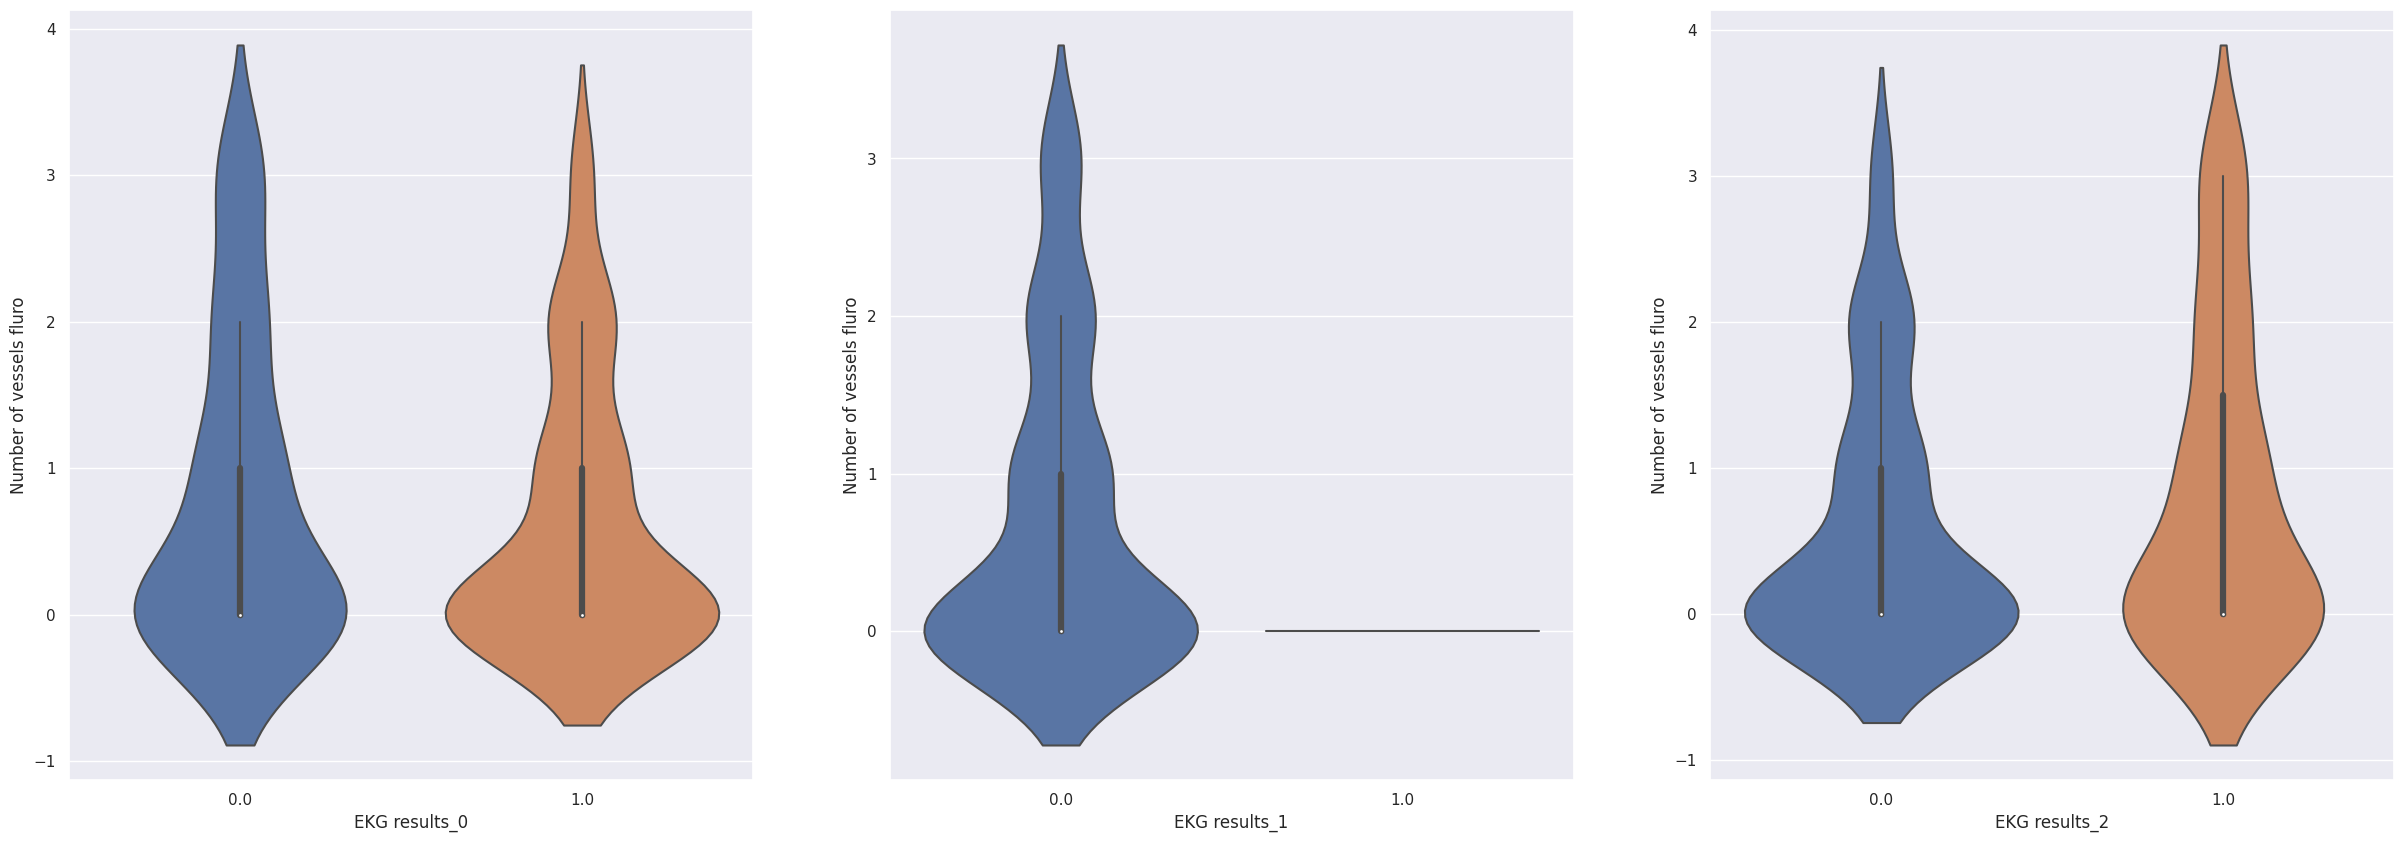

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(30,10))
sns.violinplot(ax=axes[0], x =x_train_nor['EKG results_0'] , y = y_train)
sns.violinplot(ax=axes[1], x =x_train_nor['EKG results_1'] , y = y_train)
sns.violinplot(ax=axes[2], x =x_train_nor['EKG results_2'] , y = y_train)

<Axes: xlabel='EKG results_2', ylabel='Number of vessels fluro'>

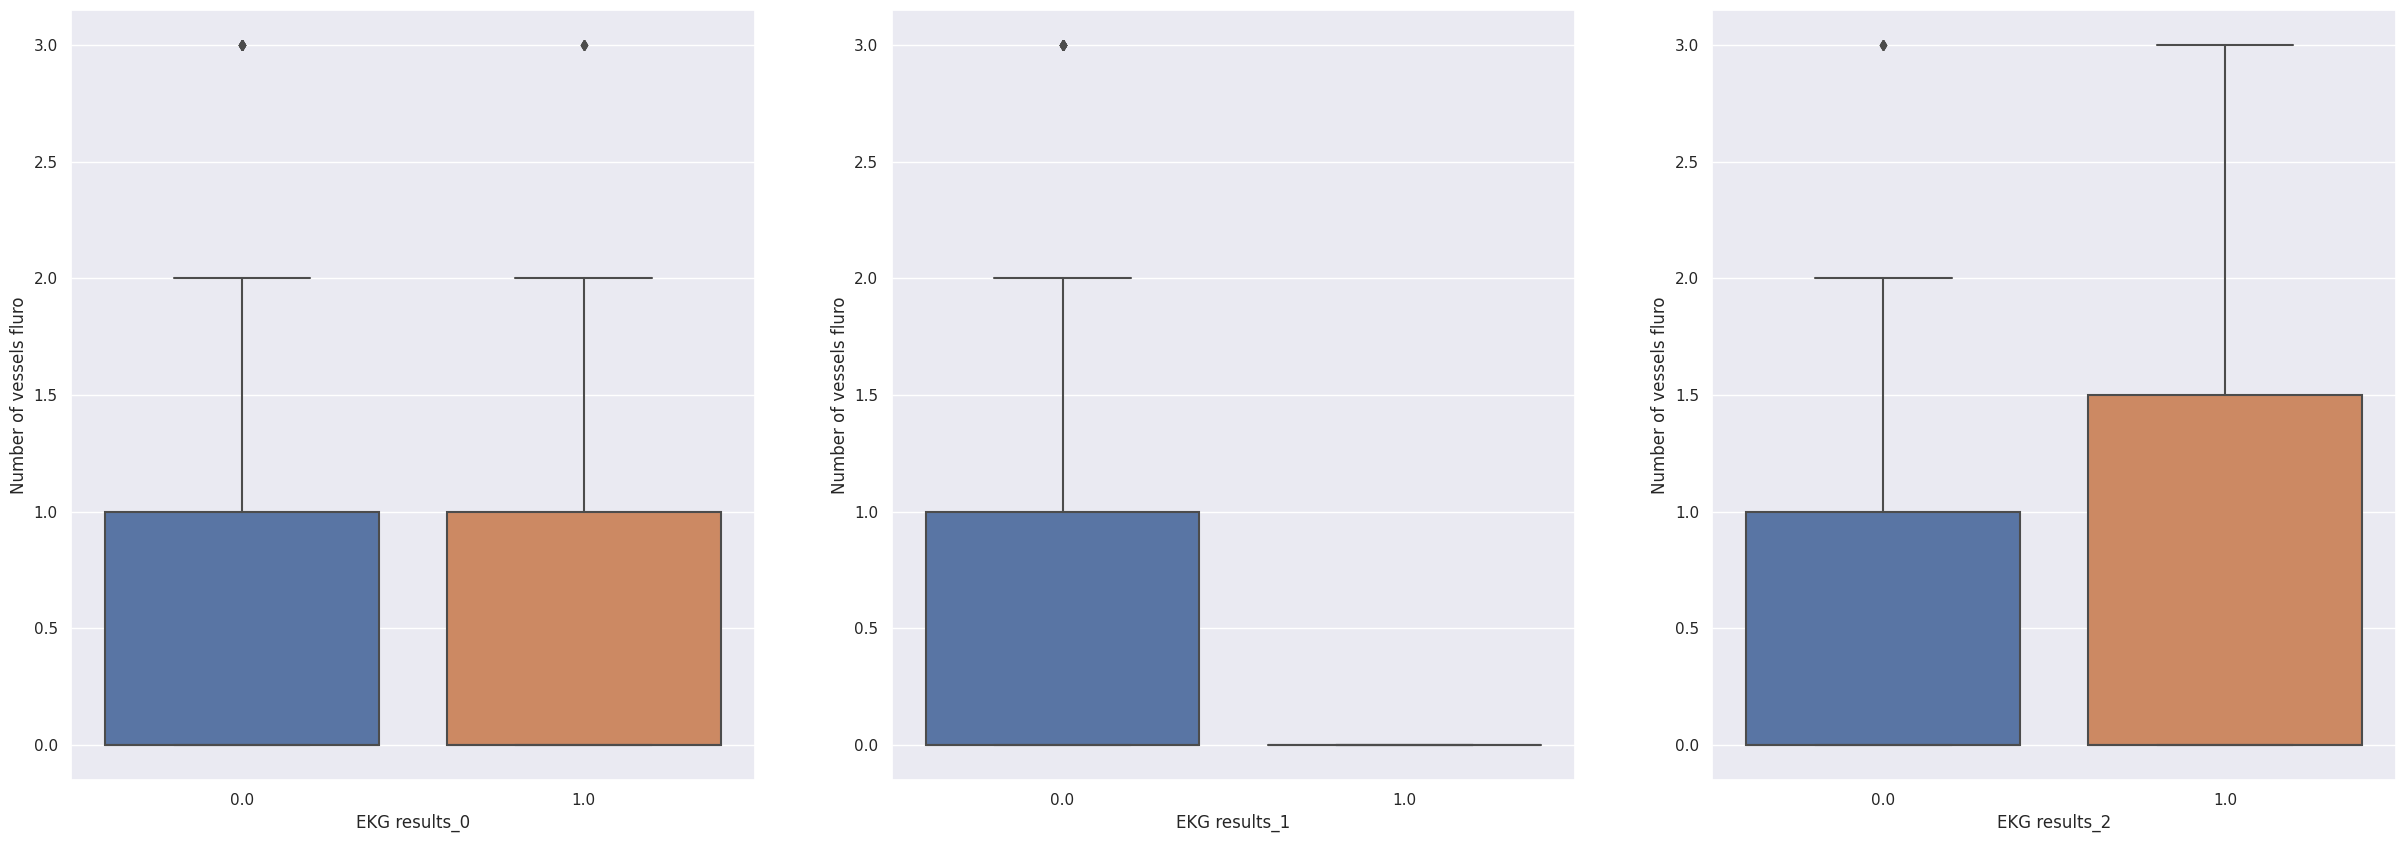

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(30,10))
sns.boxplot(ax=axes[0], x =x_train_nor['EKG results_0'] , y = y_train)
sns.boxplot(ax=axes[1], x =x_train_nor['EKG results_1'] , y = y_train)
sns.boxplot(ax=axes[2], x =x_train_nor['EKG results_2'] , y = y_train)

<Axes: xlabel='Thallium_7', ylabel='Number of vessels fluro'>

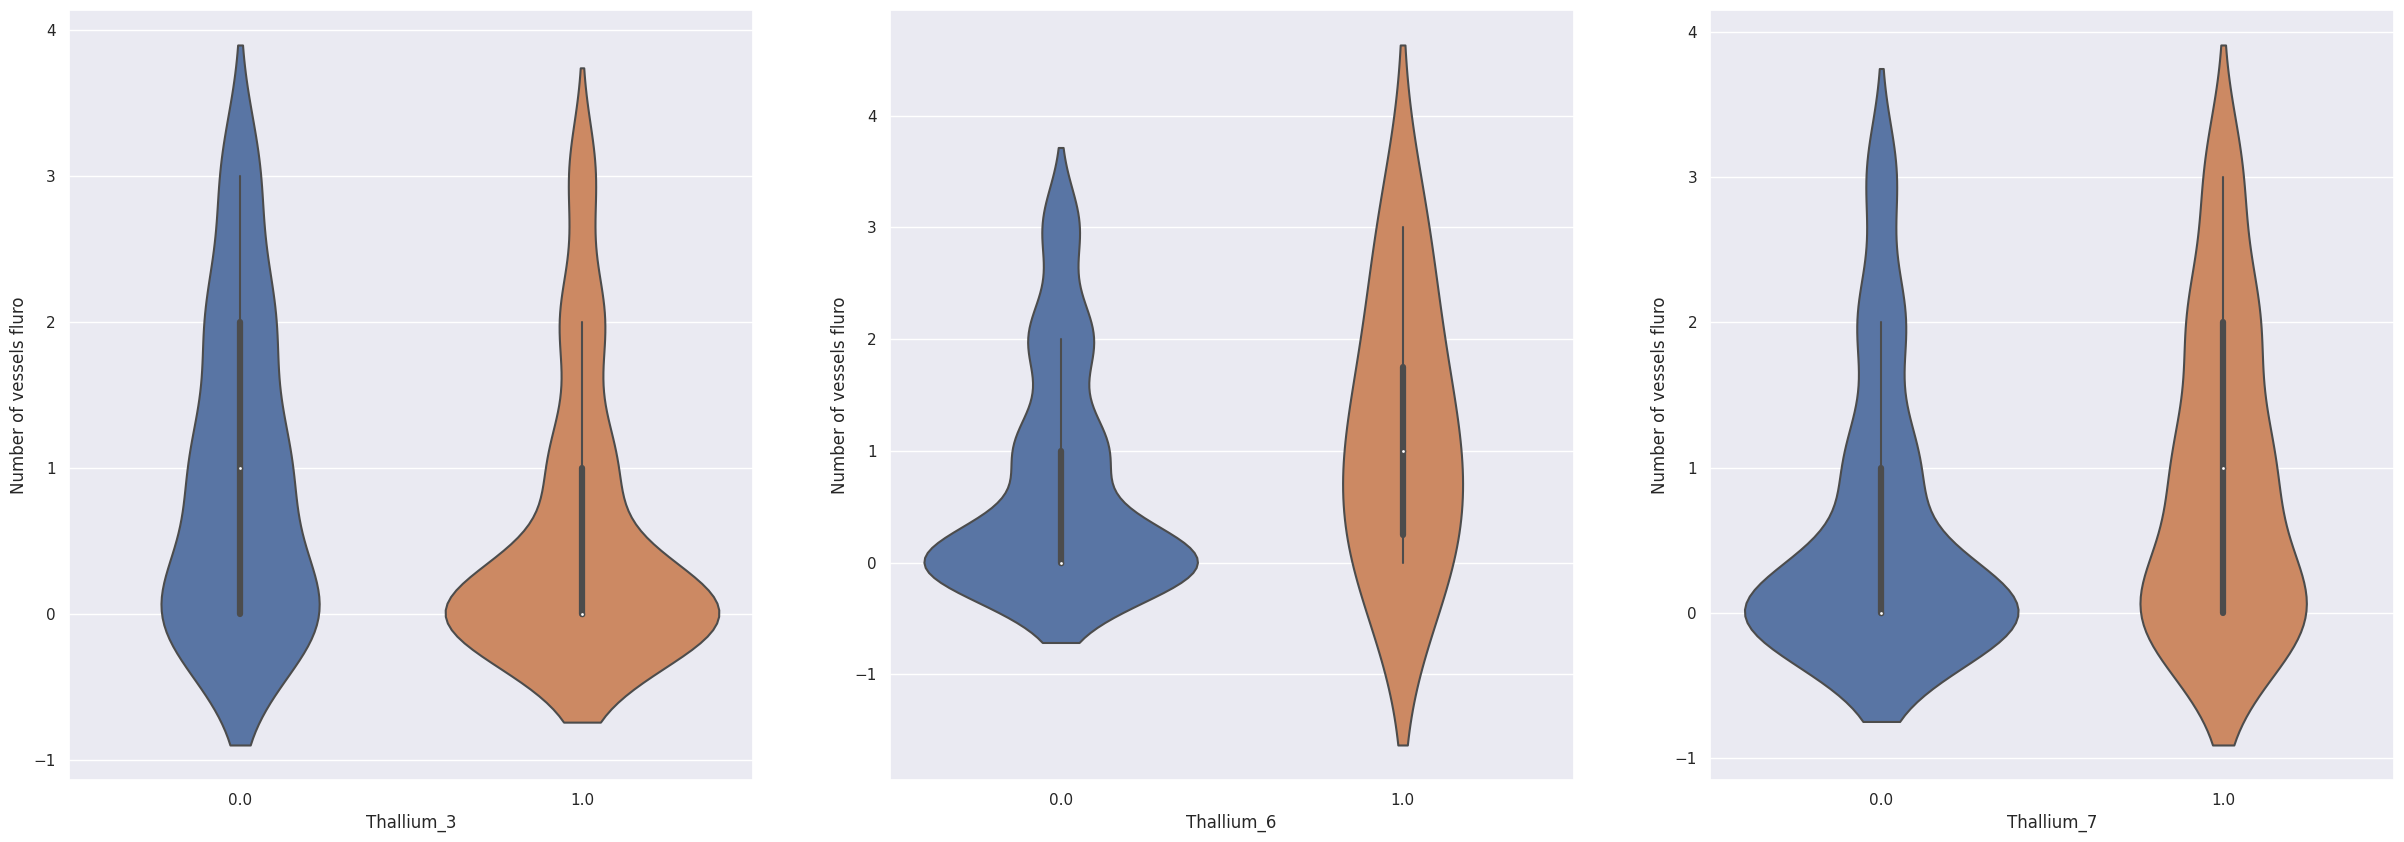

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(30,10))
sns.violinplot(ax=axes[0], x =x_train_nor['Thallium_3'] , y = y_train)
sns.violinplot(ax=axes[1], x =x_train_nor['Thallium_6'] , y = y_train)
sns.violinplot(ax=axes[2], x =x_train_nor['Thallium_7'] , y = y_train)

<Axes: xlabel='Thallium_7', ylabel='Number of vessels fluro'>

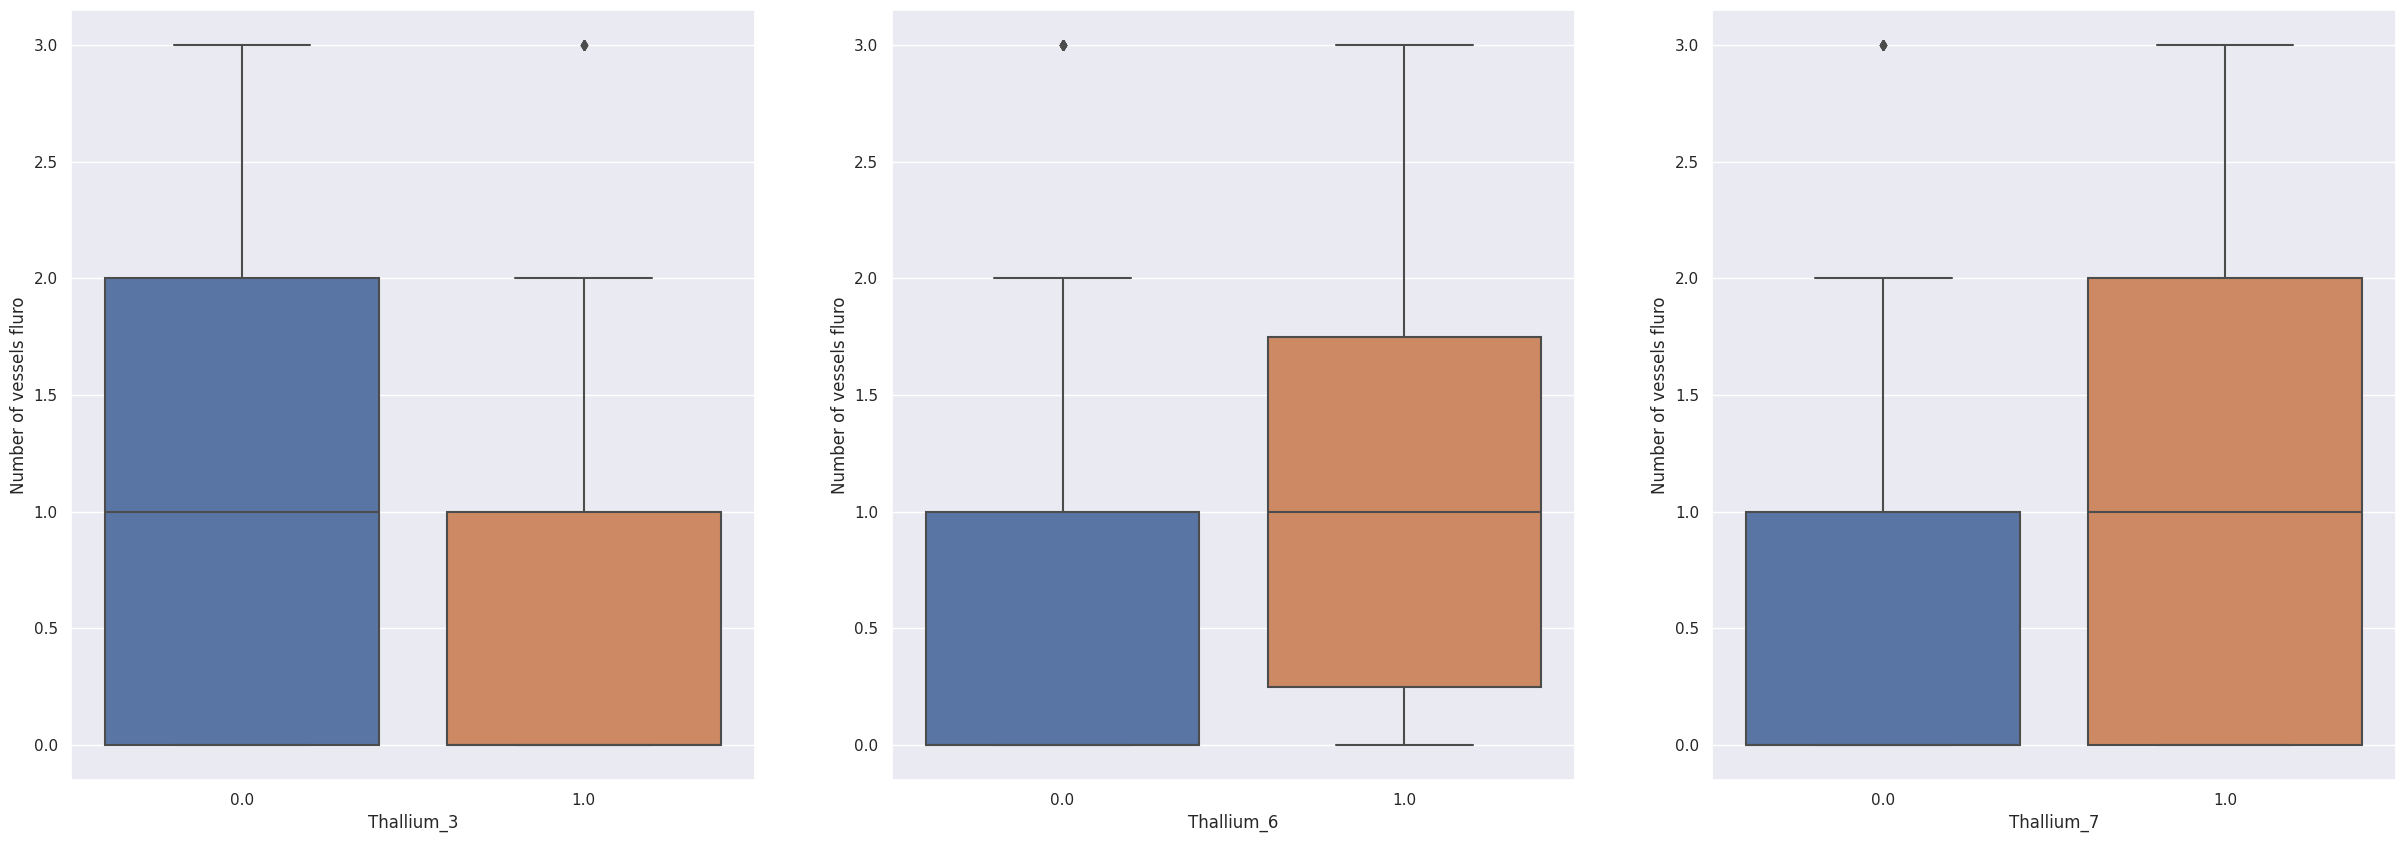

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(30,10))
sns.boxplot(ax=axes[0], x =x_train_nor['Thallium_3'] , y = y_train)
sns.boxplot(ax=axes[1], x =x_train_nor['Thallium_6'] , y = y_train)
sns.boxplot(ax=axes[2], x =x_train_nor['Thallium_7'] , y = y_train)

<Axes: xlabel='Chest pain type_4', ylabel='Count'>

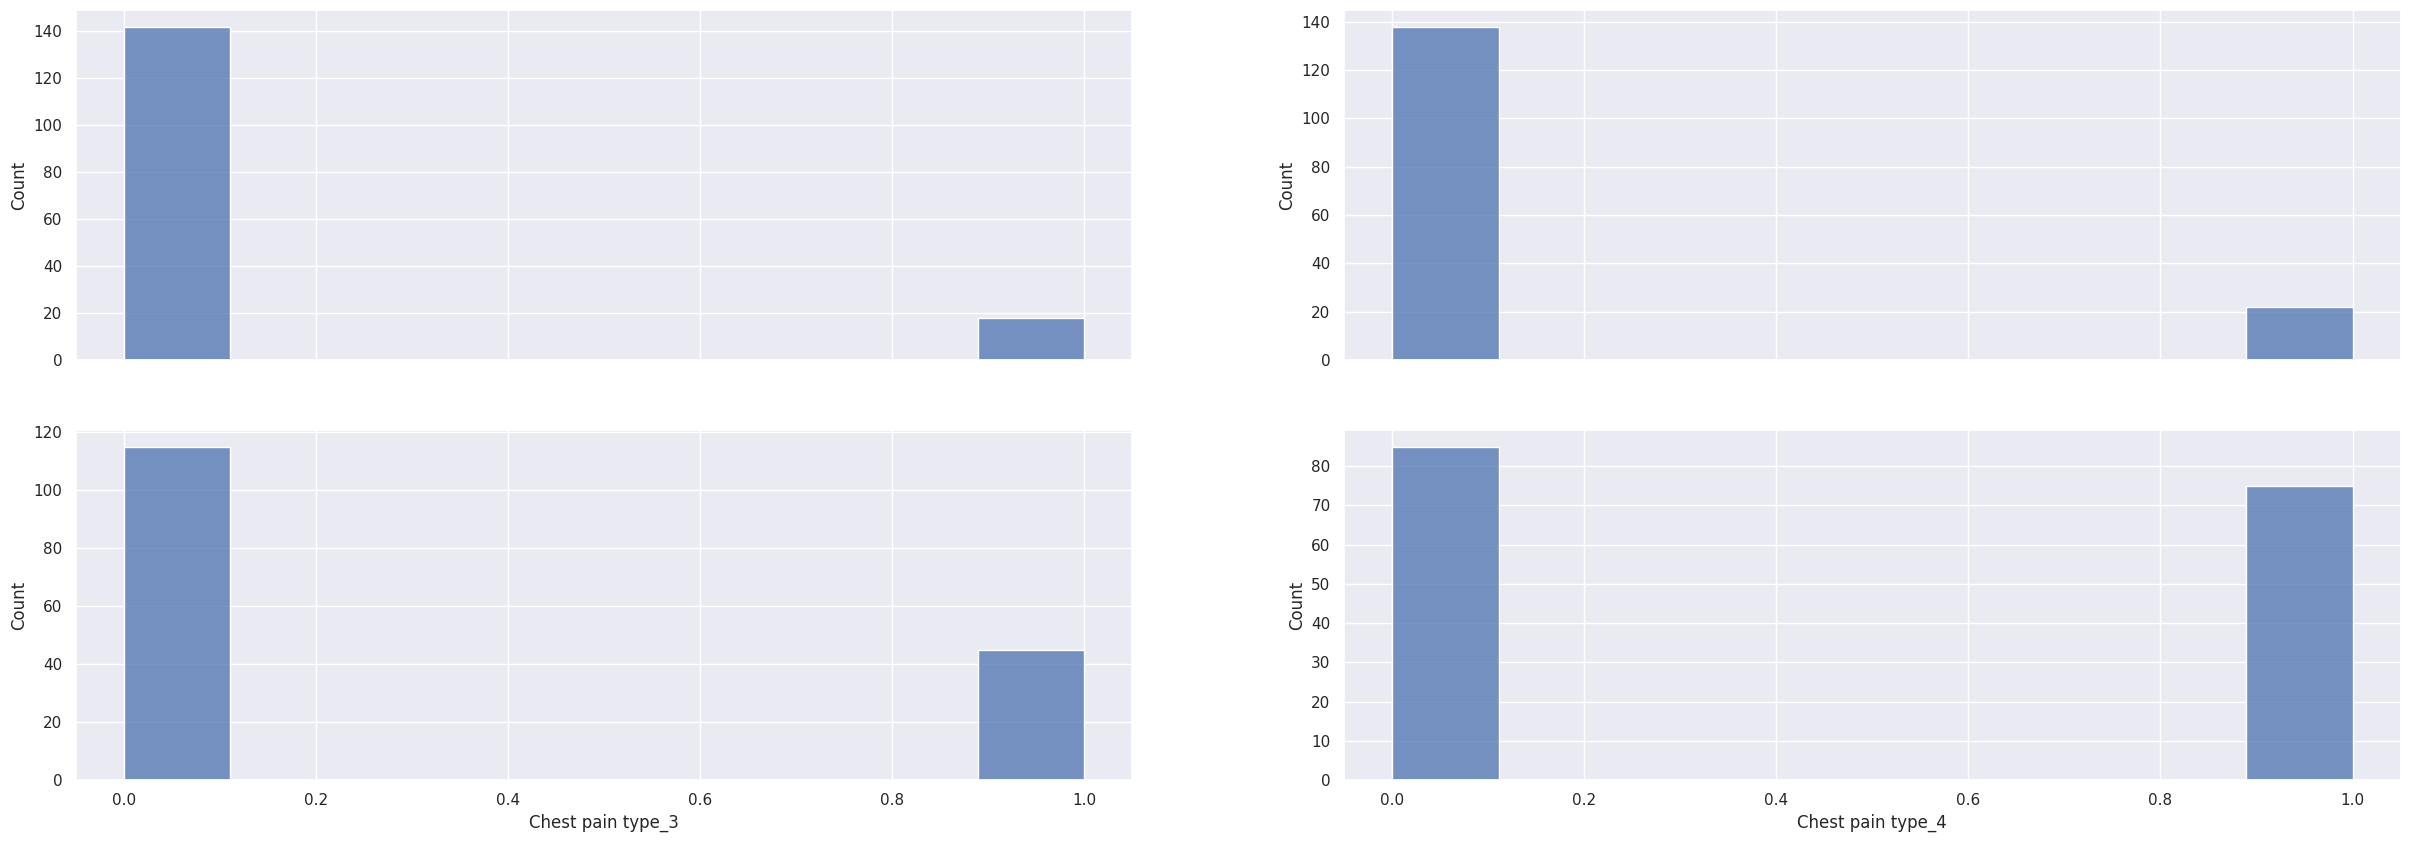

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(30,10))
sns.histplot(x_train_nor['Chest pain type_1'], ax = axes[0,0])
sns.histplot(x_train_nor['Chest pain type_2'], ax = axes[0,1])
sns.histplot(x_train_nor['Chest pain type_3'], ax = axes[1,0])
sns.histplot(x_train_nor['Chest pain type_4'], ax = axes[1,1])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 47 to 83
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                159 non-null    float64
 1   Sex                159 non-null    float64
 2   BP                 159 non-null    float64
 3   Cholesterol        159 non-null    float64
 4   FBS over 120       159 non-null    float64
 5   Max HR             159 non-null    float64
 6   Exercise angina    159 non-null    float64
 7   ST depression      159 non-null    float64
 8   Chest pain type_1  159 non-null    float64
 9   Chest pain type_2  159 non-null    float64
 10  Chest pain type_3  159 non-null    float64
 11  Chest pain type_4  159 non-null    float64
 12  EKG results_0      159 non-null    float64
 13  EKG results_1      159 non-null    float64
 14  EKG results_2      159 non-null    float64
 15  Slope of ST_1      159 non-null    float64
 16  Slope of ST_2      159 non

<Axes: >

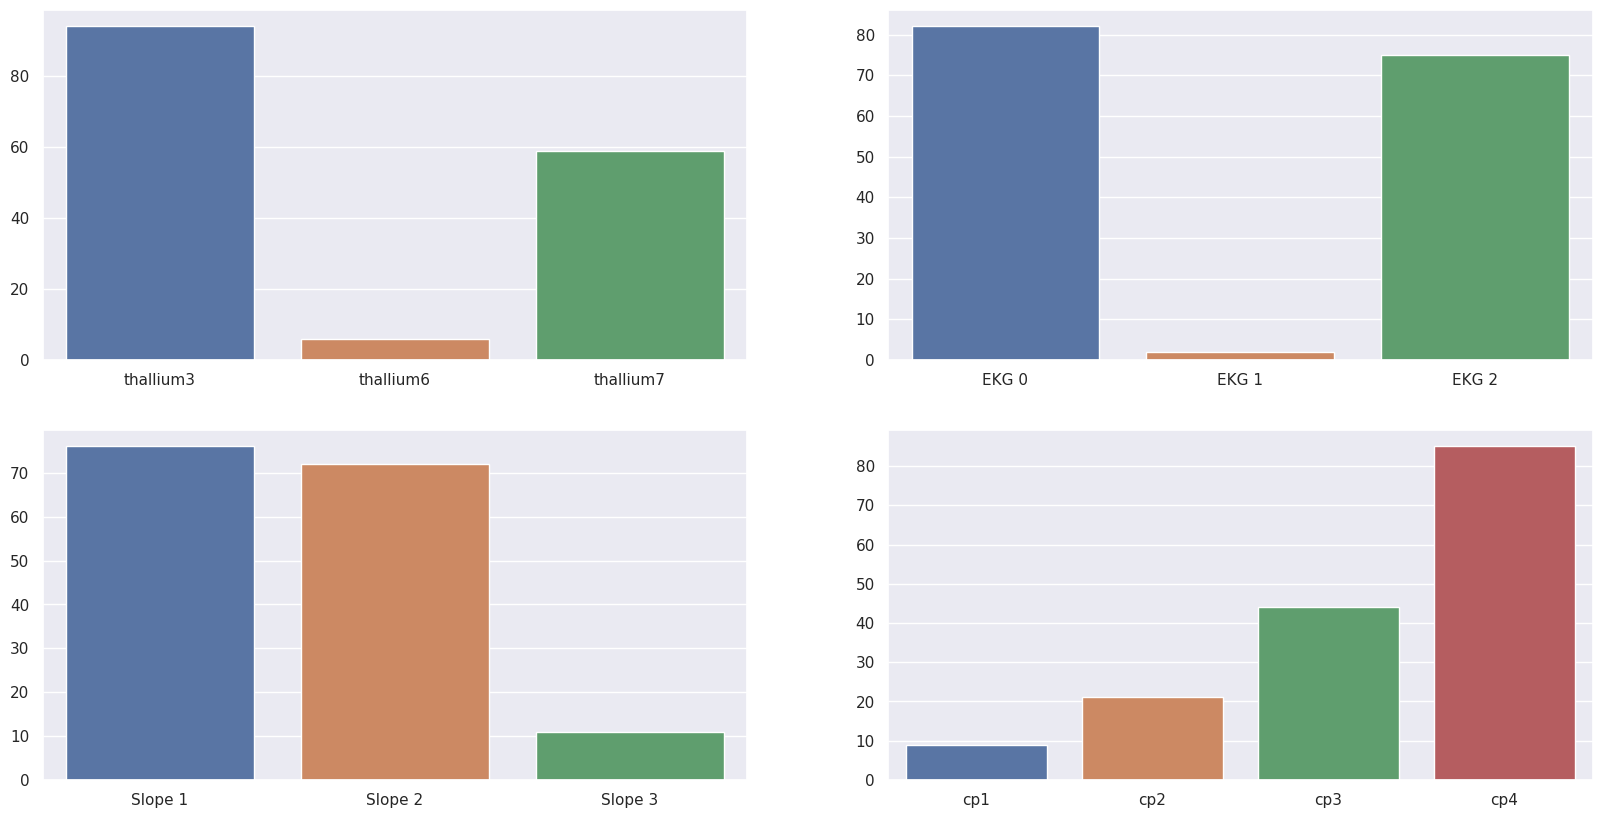

In [ ]:
Thaliu3 = 0
Thaliu6 = 0
Thaliu7 = 0
EKG0 = 0
EKG1 = 0
EKG2 = 0
slope1 = 0
slope2 = 0
slope3 = 0
cp1 = 0
cp2 = 0
cp3 = 0
cp4 = 0
outliert = 0
outlierekg = 0
outlierslope = 0
outliercp = 0
x_train_nor.info()
for i in range(len(x_train_nor)):
    if(x_train_nor.iloc[i,[18]].item() == 1):
        Thaliu3 +=1
    elif(x_train_nor.iloc[i,[19]].item() == 1):
        Thaliu6 +=1
    elif(x_train_nor.iloc[i,[20]].item() == 1):
        Thaliu7 += 1
    else:
        outliert += 1

    if(x_train_nor.iloc[i,[12]].item() == 1):
        EKG0 +=1
    elif(x_train_nor.iloc[i,[13]].item() == 1):
        EKG1 +=1
    elif(x_train_nor.iloc[i,[14]].item() == 1):
        EKG2 += 1
    else:
        outlierekg += 1

    if(x_train_nor.iloc[i,[15]].item() == 1):
        slope1 +=1
    elif(x_train_nor.iloc[i,[16]].item() == 1):
        slope2 +=1
    elif(x_train_nor.iloc[i,[17]].item() == 1):
        slope3 += 1
    else:
        outlierslope += 1

    if(x_train_nor.iloc[i,[8]].item() == 1):
        cp1 +=1
    elif(x_train_nor.iloc[i,[9]].item() == 1):
        cp2 +=1
    elif(x_train_nor.iloc[i,[10]].item() == 1):
        cp3 += 1
    elif(x_train_nor.iloc[i,[11]].item() == 1):
        cp4 += 1
    else:
        outliercp += 1

thalx = ['thallium3', 'thallium6','thallium7']
ekgx = ['EKG 0', 'EKG 1','EKG 2']
slopex = ['Slope 1', 'Slope 2','Slope 3']
cpx = ['cp1', 'cp2','cp3', 'cp4']
thaly=[Thaliu3,Thaliu6, Thaliu7]
ekgy = [EKG0, EKG1, EKG2]
slopey = [slope1, slope2, slope3]
cpy = [cp1, cp2, cp3, cp4]

fig, axes = plt.subplots(2, 2, sharex=False, figsize=(20,10))
sns.barplot(x = thalx, y = thaly, ax=axes[0][0])
sns.barplot(x = ekgx, y = ekgy, ax=axes[0][1])
sns.barplot(x = slopex, y = slopey, ax=axes[1][0])
sns.barplot(x = cpx, y =cpy, ax=axes[1][1])


<Axes: xlabel='Chest pain type_4', ylabel='Number of vessels fluro'>

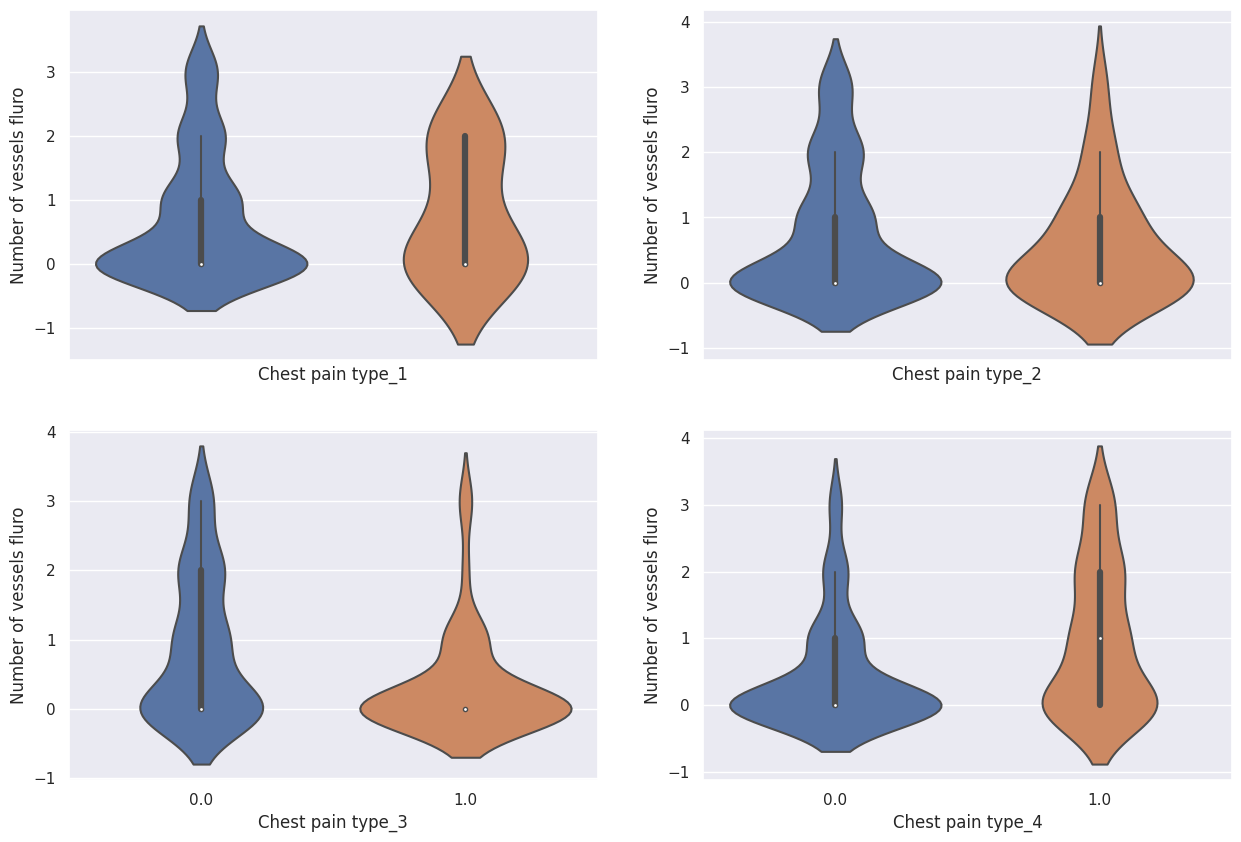

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10))


sns.violinplot(ax=axes[0,0], x = x_train_nor['Chest pain type_1'], y = y_train)
sns.violinplot(ax=axes[0,1], x = x_train_nor['Chest pain type_2'], y = y_train)
sns.violinplot(ax=axes[1,0], x = x_train_nor['Chest pain type_3'], y = y_train)
sns.violinplot(ax=axes[1,1], x = x_train_nor['Chest pain type_4'], y = y_train)

<Axes: xlabel='Chest pain type_4', ylabel='Number of vessels fluro'>

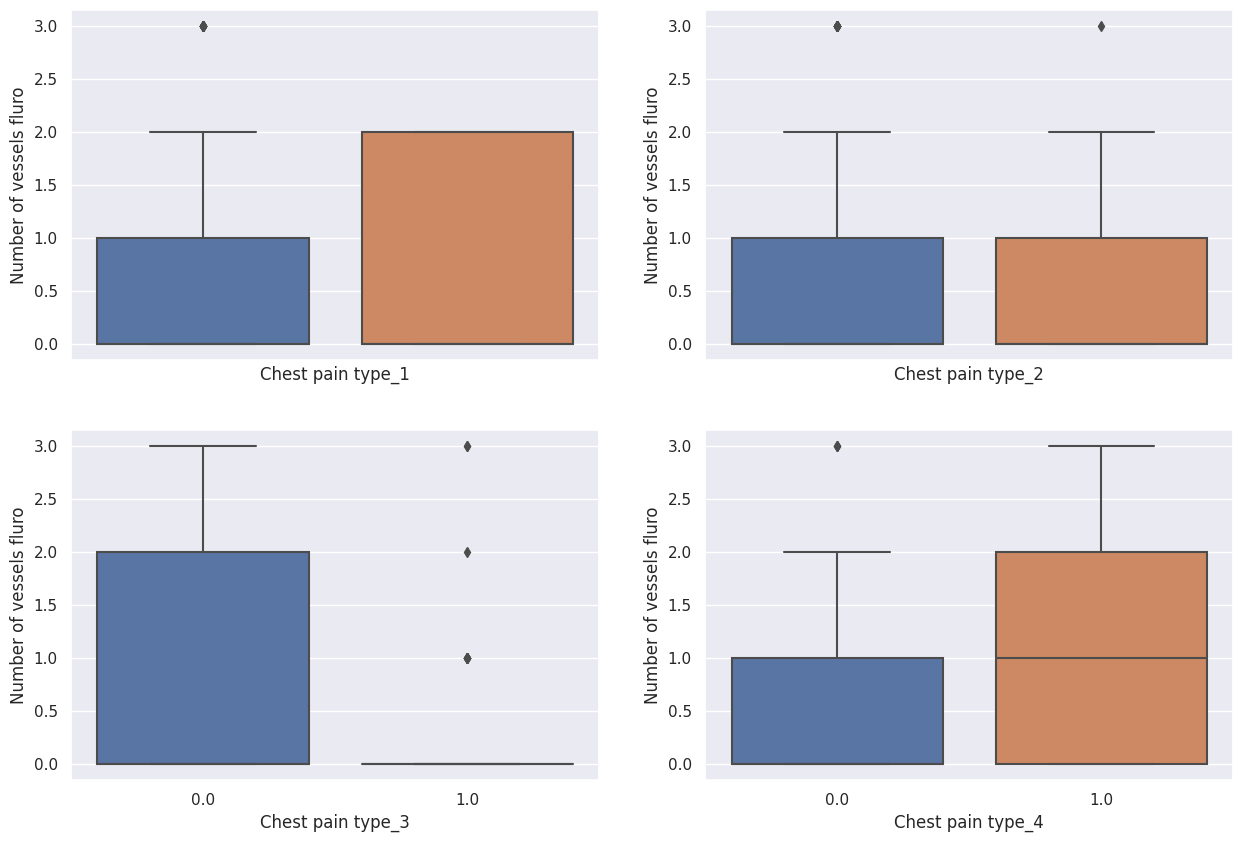

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10))


sns.boxplot(ax=axes[0,0], x = x_train_nor['Chest pain type_1'], y = y_train)
sns.boxplot(ax=axes[0,1], x = x_train_nor['Chest pain type_2'], y = y_train)
sns.boxplot(ax=axes[1,0], x = x_train_nor['Chest pain type_3'], y = y_train)
sns.boxplot(ax=axes[1,1], x = x_train_nor['Chest pain type_4'], y = y_train)

In [ ]:
# checking how well lr works with non prossed data
lclf = LogisticRegression()
lclf.fit(x_train_ad, y_train_ad)
ly_pred_train = lclf.predict(x_train_ad)
ly_pred = lclf.predict(x_val)

lacc_train = accuracy_score(y_train_ad, ly_pred_train)
lacc_val = accuracy_score(y_val, ly_pred)

print(lacc_train)
print(lacc_val)

tp = ((ly_pred == y_val) & y_val).sum() # true positive
tn = ((ly_pred == y_val) & ~y_val).sum() # true negative

fp = ((ly_pred != y_val) & ~y_val).sum() # false positive
fn = ((ly_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.5652173913043478
0.7222222222222222
TP 5
TN 34
FP 10
FN 5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# checking how well lr works with normalized data

lclf = LogisticRegression()
lclf.fit(x_train_nor, y_train_ad)
ly_pred_train = lclf.predict(x_train_nor)
ly_pred = lclf.predict(x_val_nor)

lacc_train = accuracy_score(y_train_ad, ly_pred_train)
lacc_val = accuracy_score(y_val, ly_pred)

print(lacc_train)
print(lacc_val)

tp = ((ly_pred == y_val) & y_val).sum() # true positive
tn = ((ly_pred == y_val) & ~y_val).sum() # true negative

fp = ((ly_pred != y_val) & ~y_val).sum() # false positive
fn = ((ly_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.6149068322981367
0.6851851851851852
TP 5
TN 32
FP 12
FN 5


In [ ]:
# checking how well lr works with standarized data
lclf = LogisticRegression()
lclf.fit(x_train_standardized, y_train_ad)
ly_pred_train = lclf.predict(x_train_standardized)
ly_pred = lclf.predict(x_val_standardized)

lacc_train = accuracy_score(y_train_ad, ly_pred_train)
lacc_val = accuracy_score(y_val, ly_pred)

print(lacc_train)
print(lacc_val)

tp = ((ly_pred == y_val) & y_val).sum() # true positive
tn = ((ly_pred == y_val) & ~y_val).sum() # true negative

fp = ((ly_pred != y_val) & ~y_val).sum() # false positive
fn = ((ly_pred != y_val) & y_val).sum() # false negative


print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.6415094339622641
0.5925925925925926
TP 2
TN 30
FP 9
FN 13


In [ ]:
# checking how well lr works with pca data
lclf = LogisticRegression()
lclf.fit(X_train_normalized_pca, y_train_ad)
ly_pred_train = lclf.predict(X_train_normalized_pca)
ly_pred = lclf.predict(X_val_normalized_pca)

lacc_train = accuracy_score(y_train_ad, ly_pred_train)
lacc_val = accuracy_score(y_val, ly_pred)

print(lacc_train)
print(lacc_val)

tp = ((ly_pred == y_val) & y_val).sum() # true positive
tn = ((ly_pred == y_val) & ~y_val).sum() # true negative

fp = ((ly_pred != y_val) & ~y_val).sum() # false positive
fn = ((ly_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.559748427672956
0.6666666666666666
TP 0
TN 36
FP 3
FN 15


In [ ]:
# checking how well svc works with non-process data
svclf = svm.SVC(class_weight='balanced')
svclf.fit(x_train_ad, y_train_ad)
svy_pred_train = svclf.predict(x_train_ad)
svy_pred = svclf.predict(x_val)


svacc_train = accuracy_score(y_train_ad, svy_pred_train)
svacc_val = accuracy_score(y_val, svy_pred)

print(svacc_train)
print(svacc_val)


tp = ((svy_pred == y_val) & y_val).sum() # true positive
tn = ((svy_pred == y_val) & ~y_val).sum() # true negative

fp = ((svy_pred != y_val) & ~y_val).sum() # false positive
fn = ((svy_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.22641509433962265
0.3333333333333333
TP 12
TN 6
FP 33
FN 3


In [ ]:
# checking how well svc works with normalized data
svclf = svm.SVC(class_weight='balanced')
svclf.fit(x_train_nor, y_train_ad)
svy_pred_train = svclf.predict(x_train_nor)
svy_pred = svclf.predict(x_val_nor)


svacc_train = accuracy_score(y_train_ad, svy_pred_train )
svacc_val = accuracy_score(y_val, svy_pred)

print(svacc_train)
print(svacc_val)

tp = ((svy_pred == y_val) & y_val).sum() # true positive
tn = ((svy_pred == y_val) & ~y_val).sum() # true negative

fp = ((svy_pred != y_val) & ~y_val).sum() # false positive
fn = ((svy_pred != y_val) & y_val).sum() # false negative

print(svy_pred)
print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.6289308176100629
0.4444444444444444
[0 3 3 1 2 1 3 3 0 1 0 2 0 0 3 2 0 1 2 1 3 2 2 2 2 0 0 2 2 0 0 0 0 2 2 0 1
 0 3 2 0 3 2 0 0 2 0 3 1 0 0 0 3 3]
TP 4
TN 20
FP 19
FN 11


In [ ]:
# checking how well svc works with standardized data
svclf = svm.SVC(class_weight='balanced')
svclf.fit(x_train_standardized, y_train_ad)
svy_pred_train = svclf.predict(x_train_standardized)
svy_pred = svclf.predict(x_val_standardized)


svacc_train = accuracy_score(y_train_ad, svy_pred_train)
svacc_val = accuracy_score(y_val, svy_pred)

print(svacc_train)
print(svacc_val)

tp = ((svy_pred == y_val) & y_val).sum() # true positive
tn = ((svy_pred == y_val) & ~y_val).sum() # true negative

fp = ((svy_pred != y_val) & ~y_val).sum() # false positive
fn = ((svy_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)


0.7610062893081762
0.5370370370370371
TP 3
TN 26
FP 13
FN 12


In [ ]:
# checking how well svc works with pca data
svclf = svm.SVC(class_weight='balanced')
svclf.fit(X_train_normalized_pca, y_train_ad)
svy_pred_train = svclf.predict(X_train_normalized_pca)
svy_pred = svclf.predict(X_val_normalized_pca)


svacc_train = accuracy_score(y_train_ad, svy_pred_train)
svacc_val = accuracy_score(y_val, svy_pred)

print(svacc_train)
print(svacc_val)


tp = ((svy_pred == y_val) & y_val).sum() # true positive
tn = ((svy_pred == y_val) & ~y_val).sum() # true negative

fp = ((svy_pred != y_val) & ~y_val).sum() # false positive
fn = ((svy_pred != y_val) & y_val).sum() # false negative


print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.4779874213836478
0.37037037037037035
TP 4
TN 16
FP 23
FN 11


In [ ]:
# Checking how well knn works with non-process_data
knnclf = KNeighborsClassifier(n_neighbors=5)
knnclf.fit(x_train_ad, y_train_ad)
knny_pred_train = knnclf.predict(x_train_ad)
knny_pred = knnclf.predict(x_val)


knnacc_train = accuracy_score(y_train_ad, knny_pred_train)
knnacc_val = accuracy_score(y_val, knny_pred)

print(knnacc_train)
print(knnacc_val)

tp = ((knny_pred == y_val) & y_val).sum() # true positive
tn = ((knny_pred == y_val) & ~y_val).sum() # true negative

fp = ((knny_pred != y_val) & ~y_val).sum() # false positive
fn = ((knny_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.6037735849056604
0.6111111111111112
TP 2
TN 31
FP 8
FN 13


In [ ]:
# Checking how well knn works with normalized data
knnclf = KNeighborsClassifier(n_neighbors=5)
knnclf.fit(x_train_nor, y_train_ad)
knny_pred_train = knnclf.predict(x_train_nor)
knny_pred = knnclf.predict(x_val_nor)


knnacc_train = accuracy_score(y_train_ad, knny_pred_train)
knnacc_val = accuracy_score(y_val, knny_pred)

print(knnacc_train)
print(knnacc_val)


tp = ((knny_pred == y_val) & y_val).sum() # true positive
tn = ((knny_pred == y_val) & ~y_val).sum() # true negative

fp = ((knny_pred != y_val) & ~y_val).sum() # false positive
fn = ((knny_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.6226415094339622
0.6296296296296297
TP 2
TN 32
FP 7
FN 13


In [ ]:
# Checking how well knn works with standardized data
knnclf = KNeighborsClassifier(n_neighbors=5)
knnclf.fit(x_train_standardized, y_train_ad)
knny_pred_train = knnclf.predict(x_train_standardized)
knny_pred = knnclf.predict(x_val_standardized)


knnacc_train = accuracy_score(y_train_ad, knny_pred_train)
knnacc_val = accuracy_score(y_val, knny_pred)

print(knnacc_train)
print(knnacc_val)

tp = ((knny_pred == y_val) & y_val).sum() # true positive
tn = ((knny_pred == y_val) & ~y_val).sum() # true negative

fp = ((knny_pred != y_val) & ~y_val).sum() # false positive
fn = ((knny_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.6792452830188679
0.5740740740740741
TP 1
TN 30
FP 9
FN 14


In [ ]:
# Checking how well knn works with pca data
knnclf = KNeighborsClassifier(n_neighbors=5)
knnclf.fit(X_train_normalized_pca, y_train_ad)
knny_pred_train = knnclf.predict(X_train_normalized_pca)
knny_pred = knnclf.predict(X_val_normalized_pca)


knnacc_train = accuracy_score(y_train_ad, knny_pred_train)
knnacc_val = accuracy_score(y_val, knny_pred)

print(knnacc_train)
print(knnacc_val)

tp = ((knny_pred == y_val) & y_val).sum() # true positive
tn = ((knny_pred == y_val) & ~y_val).sum() # true negative

fp = ((knny_pred != y_val) & ~y_val).sum() # false positive
fn = ((knny_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.6289308176100629
0.6111111111111112
TP 0
TN 33
FP 6
FN 15


In [ ]:
# checking how well decision tree works with non-processd data
trclf =  tree.DecisionTreeClassifier(max_depth=3)
trclf.fit(x_train_ad, y_train_ad)
try_pred_train = trclf.predict(x_train_ad)
try_pred = trclf.predict(x_val)


tracc_train = accuracy_score(y_train_ad, try_pred_train)
tracc_val = accuracy_score(y_val, try_pred)

print(tracc_train)
print(tracc_val)

tp = ((try_pred == y_val) & y_val).sum() # true positive
tn = ((try_pred == y_val) & ~y_val).sum() # true negative

fp = ((try_pred != y_val) & ~y_val).sum() # false positive
fn = ((try_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.6477987421383647
0.6111111111111112
TP 2
TN 31
FP 8
FN 13


In [ ]:
# checking ho well decision tree works with normalized data
trclf =  tree.DecisionTreeClassifier(max_depth=3)
trclf.fit(x_train_nor, y_train_ad)
try_pred_train = trclf.predict(x_train_nor)
try_pred = trclf.predict(x_val_nor)


tracc_train = accuracy_score(y_train_ad, try_pred_train)
tracc_val = accuracy_score(y_val, try_pred)

print(tracc_train)
print(tracc_val)
tp = ((try_pred == y_val) & y_val).sum() # true positive
tn = ((try_pred == y_val) & ~y_val).sum() # true negative

fp = ((try_pred != y_val) & ~y_val).sum() # false positive
fn = ((try_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.6477987421383647
0.5555555555555556
TP 3
TN 27
FP 12
FN 12


In [ ]:
# checking ho well decision tree works with standardized data
trclf =  tree.DecisionTreeClassifier(max_depth=3)
trclf.fit(x_train_standardized, y_train_ad)
try_pred_train = trclf.predict(x_train_standardized)
try_pred = trclf.predict(x_val_standardized)


tracc_train = accuracy_score(y_train_ad, try_pred_train)
tracc_val = accuracy_score(y_val, try_pred)

print(tracc_train)
print(tracc_val)

tp = ((try_pred == y_val) & y_val).sum() # true positive
tn = ((try_pred == y_val) & ~y_val).sum() # true negative

fp = ((try_pred != y_val) & ~y_val).sum() # false positive
fn = ((try_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.6477987421383647
0.6296296296296297
TP 2
TN 32
FP 7
FN 13


In [ ]:
# checking ho well decision tree works with pca data
trclf =  tree.DecisionTreeClassifier(max_depth=3)
trclf.fit(X_train_normalized_pca, y_train_ad)
try_pred_train = trclf.predict(X_train_normalized_pca)
try_pred = trclf.predict(X_val_normalized_pca)


tracc_train = accuracy_score(y_train_ad, try_pred_train)
tracc_val = accuracy_score(y_val, try_pred)

print(tracc_train)
print(tracc_val)

tp = ((try_pred == y_val) & y_val).sum() # true positive
tn = ((try_pred == y_val) & ~y_val).sum() # true negative

fp = ((try_pred != y_val) & ~y_val).sum() # false positive
fn = ((try_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.6289308176100629
0.5555555555555556
TP 1
TN 29
FP 10
FN 14


In [91]:
# mlp for non-processed
MLPclf =  MLPClassifier(random_state=1,max_iter=10000, hidden_layer_sizes = (3, 3))
MLPclf.fit(x_train_ad, y_train_ad)
MLPy_pred_train = MLPclf.predict(x_train_ad)
MLPy_pred = MLPclf.predict(x_val)


MLPacc_train = accuracy_score(y_train_ad, MLPy_pred_train)
MLPacc_val = accuracy_score(y_val, MLPy_pred)

print(MLPacc_train)
print(MLPacc_val)
print(MLPy_pred)
tp = ((MLPy_pred == y_val) & y_val).sum() # true positive
tn = ((MLPy_pred == y_val) & ~y_val).sum() # true negative

fp = ((MLPy_pred != y_val) & ~y_val).sum() # false positive
fn = ((MLPy_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.5660377358490566
0.6111111111111112
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
TP 0
TN 33
FP 5
FN 16


In [ ]:
# mlp for normalized

MLPclf =  MLPClassifier(random_state=1,max_iter=10000, hidden_layer_sizes = (3, 3))
MLPclf.fit(x_train_nor, y_train_ad)
MLPy_pred_train = MLPclf.predict(x_train_nor)
MLPy_pred = MLPclf.predict(x_val_nor)


MLPacc_train = accuracy_score(y_train_ad, MLPy_pred_train)
MLPacc_val = accuracy_score(y_val, MLPy_pred)

print(MLPacc_train)
print(MLPacc_val)

tp = ((MLPy_pred == y_val) & y_val).sum() # true positive
tn = ((MLPy_pred == y_val) & ~y_val).sum() # true negative

fp = ((MLPy_pred != y_val) & ~y_val).sum() # false positive
fn = ((MLPy_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.7125
0.5
TP 1
TN 26
FP 16
FN 11


In [ ]:
# mlp for standardized
MLPclf =  MLPClassifier(random_state=1,max_iter=10000, hidden_layer_sizes = (3, 3))
MLPclf.fit(x_train_standardized, y_train_ad)
MLPy_pred_train = MLPclf.predict(x_train_standardized)
MLPy_pred = MLPclf.predict(x_val_standardized)


MLPacc_train = accuracy_score(y_train_ad, MLPy_pred_train)
MLPacc_val = accuracy_score(y_val, MLPy_pred)

print(MLPacc_train)
print(MLPacc_val)

tp = ((MLPy_pred == y_val) & y_val).sum() # true positive
tn = ((MLPy_pred == y_val) & ~y_val).sum() # true negative

fp = ((MLPy_pred != y_val) & ~y_val).sum() # false positive
fn = ((MLPy_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)


0.7375
0.5185185185185185
TP 1
TN 27
FP 15
FN 11


In [ ]:
# mlp for pca


MLPclf =  MLPClassifier(random_state=1,max_iter=10000, hidden_layer_sizes = (3, 3))
MLPclf.fit(X_train_normalized_pca, y_train_ad)
MLPy_pred_train = MLPclf.predict(X_train_normalized_pca)
MLPy_pred = MLPclf.predict(X_val_normalized_pca)


MLPacc_train = accuracy_score(y_train_ad, MLPy_pred_train)
MLPacc_val = accuracy_score(y_val, MLPy_pred)

print(MLPacc_train)
print(MLPacc_val)

tp = ((MLPy_pred == y_val) & y_val).sum() # true positive
tn = ((MLPy_pred == y_val) & ~y_val).sum() # true negative

fp = ((MLPy_pred != y_val) & ~y_val).sum() # false positive
fn = ((MLPy_pred != y_val) & y_val).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

0.5660377358490566
0.6851851851851852
TP 0
TN 37
FP 2
FN 15


In [151]:
Y_train1 = pd.concat([y_train_ad,y_val])
Y_test1 = y_test

X_train1 = pd.concat([x_train_ad,x_val])
X_test1 = x_test

X_trainn = pd.concat([x_train_nor,x_val_nor])
X_testnn = x_test_nor

X_trains = pd.concat([x_train_standardized,x_val_standardized])
X_tests = x_test_standardized

X_trainp = pd.concat([X_train_normalized_pca,X_val_normalized_pca])
X_testp = X_test_normalized_pca

In [ ]:
# tree
trclf =  tree.DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(trclf, X_trains, Y_train1, cv=5, scoring='accuracy')

print(scores)

scores = cross_validate(trclf, X_trains, Y_train1, cv=5, scoring=['accuracy'])
print(scores['test_accuracy'])
print(scores['fit_time'])
print(scores['score_time'])


[0.51162791 0.60465116 0.55813953 0.44186047 0.58139535]
[0.51162791 0.60465116 0.55813953 0.46511628 0.58139535]
[0.01249862 0.0123229  0.0069325  0.00540519 0.01282692]
[0.00353909 0.01114631 0.01077843 0.01144242 0.00346065]


In [ ]:
# knn
knclf =  KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knclf, X_trainp, Y_train1, cv=5, scoring='accuracy')

print(scores)

scores = cross_validate(knclf, X_trainp, Y_train1, cv=5, scoring=['accuracy'])
print(scores['test_accuracy'])
print(scores['fit_time'])
print(scores['score_time'])

[0.51162791 0.51162791 0.44186047 0.55813953 0.48837209]
[0.51162791 0.51162791 0.44186047 0.55813953 0.48837209]
[0.00401926 0.00389504 0.00454688 0.00361776 0.00337911]
[0.00948644 0.00909495 0.00891328 0.00838351 0.00808477]


In [ ]:
# logistic
lclf = LogisticRegression()
scores = cross_val_score(lclf, X_trainp, Y_train1, cv=5, scoring='accuracy')

print(scores)

scores = cross_validate(lclf, X_trainp, Y_train1, cv=5, scoring=['accuracy'])
print(scores['test_accuracy'])
print(scores['fit_time'])
print(scores['score_time'])

[0.55813953 0.55813953 0.60465116 0.55813953 0.60465116]
[0.55813953 0.55813953 0.60465116 0.55813953 0.60465116]
[0.01145673 0.01302624 0.0115931  0.0126183  0.01187348]
[0.00350595 0.00417781 0.00750613 0.00425529 0.00410104]


In [ ]:
# svc
svclf =  svm.SVC(class_weight='balanced')
scores = cross_val_score(svclf, X_trainp, Y_train1, cv=5, scoring='accuracy')

print(scores)

scores = cross_validate(svclf, X_trainp, Y_train1, cv=5, scoring=['accuracy'])
print(scores['test_accuracy'])
print(scores['fit_time'])
print(scores['score_time'])

[0.44186047 0.39534884 0.3255814  0.23255814 0.27906977]
[0.44186047 0.39534884 0.3255814  0.23255814 0.27906977]
[0.00898409 0.00831509 0.0082047  0.00828433 0.00792789]
[0.00425625 0.00405645 0.00415993 0.00383997 0.00421715]


In [ ]:
clf = svm.SVC(class_weight='balanced')
parameters = {'kernel':('linear', 'rbf'), 'C':[1,5, 10]}
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train1, Y_train1)
print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_) # to get the best estimator



{'C': 10, 'kernel': 'rbf'}
SVC(C=10, class_weight='balanced')


In [132]:
ksvclf = svm.SVC(C = 5, kernel = 'linear',class_weight='balanced')
ksvclf.fit(X_train1, Y_train1)
ksvy_pred_train = ksvclf.predict(X_train1)
ksvy_pred = ksvclf.predict(X_test1)


ksvacc_train = accuracy_score(Y_train1, ksvy_pred_train)
ksvacc_test = accuracy_score(Y_test1, ksvy_pred)

print(ksvacc_train)
print(ksvacc_test)

print(len(ksvy_pred))
print(ksvy_pred)

0.5841121495327103
0.4074074074074074
54
[0 1 3 0 0 2 0 2 3 0 1 0 2 0 2 0 3 3 0 3 2 3 1 2 0 0 0 3 0 3 3 3 0 2 2 3 0
 0 2 3 1 3 2 1 3 1 3 0 2 0 2 0 0 1]


0.6435185185185185
0.6296296296296297
TP 1
TN 33
FP 11
FN 9


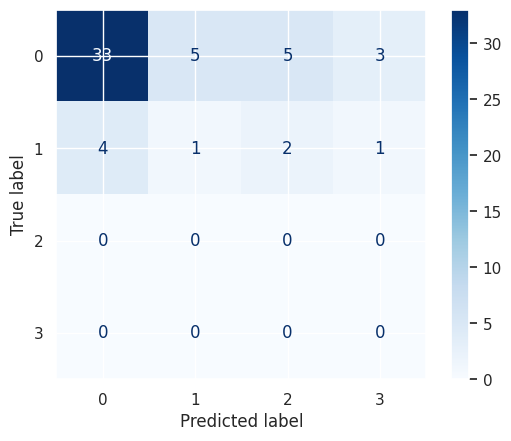

In [152]:
# tree final
trclf =  tree.DecisionTreeClassifier(max_depth=3)
trclf.fit(X_trainn, Y_train1)
try_pred_train = trclf.predict(X_trainn)
try_pred = trclf.predict(X_testnn)


tracc_train = accuracy_score(Y_train1, try_pred_train)
tracc_val = accuracy_score(Y_test1, try_pred)

print(tracc_train)
print(tracc_val)

tp = ((try_pred == Y_test1) & Y_test1).sum() # true positive
tn = ((try_pred == Y_test1) & ~Y_test1).sum() # true negative

fp = ((try_pred != Y_test1) & ~Y_test1).sum() # false positive
fn = ((try_pred != Y_test1) & Y_test1).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

cm = confusion_matrix(try_pred, Y_test1)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

0.6527777777777778
0.5740740740740741
TP 1
TN 30
FP 14
FN 9


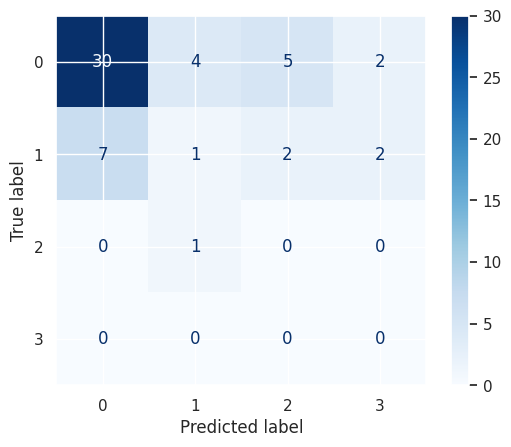

In [153]:
#knn final
knnclf = KNeighborsClassifier(n_neighbors=5)
knnclf.fit(X_trainn, Y_train1)
knny_pred_train = knnclf.predict(X_trainn)
knny_pred = knnclf.predict(X_testnn)


knnacc_train = accuracy_score(Y_train1, knny_pred_train)
knnacc_val = accuracy_score(Y_test1, knny_pred)

print(knnacc_train)
print(knnacc_val)

tp = ((knny_pred == Y_test1) & Y_test1).sum() # true positive
tn = ((knny_pred == Y_test1) & ~Y_test1).sum() # true negative

fp = ((knny_pred != Y_test1) & ~Y_test1).sum() # false positive
fn = ((knny_pred != Y_test1) & Y_test1).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

cm = confusion_matrix(knny_pred, Y_test1)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

0.6574074074074074
0.6851851851851852
TP 3
TN 34
FP 10
FN 7


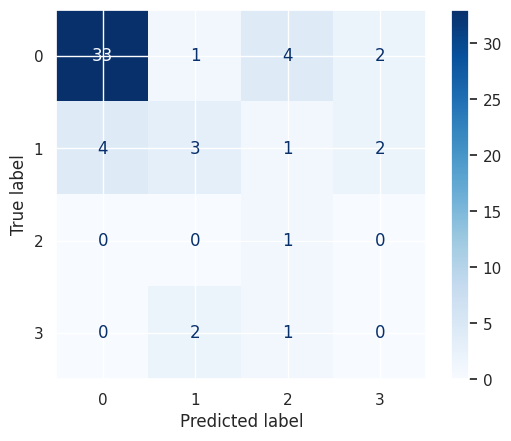

In [154]:
# lr final
lclf = LogisticRegression(max_iter=10000)
lclf.fit(X_trainn, Y_train1)
ly_pred_train = lclf.predict(X_trainn)
ly_pred = lclf.predict(X_testnn)

lacc_train = accuracy_score(Y_train1, ly_pred_train)
lacc_val = accuracy_score(Y_test1, ly_pred)

print(lacc_train)
print(lacc_val)

tp = ((ly_pred == Y_test1) & Y_test1).sum() # true positive
tn = ((ly_pred == Y_test1) & ~Y_test1).sum() # true negative

fp = ((ly_pred != Y_test1) & ~Y_test1).sum() # false positive
fn = ((ly_pred != Y_test1) & Y_test1).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

cm = confusion_matrix(ly_pred, Y_test1)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

In [ ]:
lclf = LogisticRegression(max_iter = 10000)
parameters = {'penalty':(None, 'l2'), 'C':[0.1, 0.5,  1,2,3,4, 5,6,7,8,9, 10], 'class_weight':(None, "balanced")}
grid_search = GridSearchCV(lclf, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_trainn, Y_train1)
print(grid_search.best_params_) # to get the best parameters
print("est")
print(grid_search.best_estimator_) # to get the best estimator
print("all")
print(grid_search.cv_results_) # to get all results


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

{'C': 4, 'class_weight': None, 'penalty': 'l2'}
est
LogisticRegression(C=4, max_iter=10000)
all
{'mean_fit_time': array([0.0807508 , 0.01135268, 0.07915244, 0.01025729, 0.0765656 ,
       0.01520758, 0.07606163, 0.01915441, 0.07798553, 0.01878576,
       0.07373695, 0.02037935, 0.07649198, 0.02179399, 0.07428122,
       0.02709126, 0.07759981, 0.02594481, 0.07397118, 0.02737513,
       0.07820106, 0.02910681, 0.07799034, 0.02965803, 0.07815886,
       0.02982516, 0.0812007 , 0.03259988, 0.07723446, 0.0308238 ,
       0.09206586, 0.04428973, 0.12414322, 0.05040164, 0.11657214,
       0.05190244, 0.12291789, 0.05822444, 0.11317649, 0.0524724 ,
       0.12097592, 0.05432887, 0.1273458 , 0.05595398, 0.10084414,
       0.03541703, 0.07552791, 0.04275312]), 'std_fit_time': array([0.00646367, 0.00342528, 0.01285928, 0.00146291, 0.00694252,
       0.00182939, 0.00920595, 0.00779877, 0.01101981, 0.00256571,
       0.01133739, 0.00364591, 0.00412356, 0.00042042, 0.01028676,
       0.0068481 , 0.

0.6728971962616822
0.5925925925925926
TP 5
TN 27
FP 9
FN 13


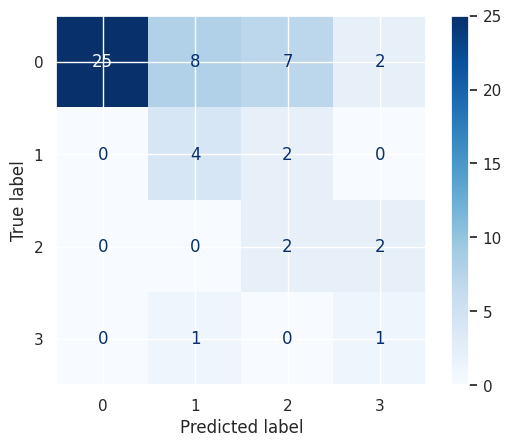

In [125]:
# lr final
lclf = LogisticRegression(C=4,max_iter=10000)
lclf.fit(X_trains, Y_train1)
ly_pred_train = lclf.predict(X_trains)
ly_pred = lclf.predict(X_tests)

lacc_train = accuracy_score(Y_train1, ly_pred_train)
lacc_val = accuracy_score(Y_test1, ly_pred)

print(lacc_train)
print(lacc_val)

tp = ((ly_pred == Y_test1) & Y_test1).sum() # true positive
tn = ((ly_pred == Y_test1) & ~Y_test1).sum() # true negative

fp = ((ly_pred != Y_test1) & ~Y_test1).sum() # false positive
fn = ((ly_pred != Y_test1) & Y_test1).sum() # false negative

print("TP", tp)
print("TN", tn)
print("FP", fp)
print("FN", fn)

cm = confusion_matrix(ly_pred, Y_test1)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)